In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [2]:
plt.style.available
plt.style.use('default')

In [230]:
raw_mobility = pd.read_csv('applemobilitytrends-2020-06-07.csv')
raw_mobility

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,67.85,67.47,68.61,90.62,88.33,89.97,84.30,93.46,102.16,111.59
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,69.89,56.67,59.53,84.18,93.86,87.72,94.75,83.24,81.96,87.25
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,48.26,40.39,23.77,39.64,41.88,43.77,45.84,52.26,47.48,27.32
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,34.67,28.70,17.40,29.50,31.25,30.65,31.93,37.34,33.53,19.60
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,92.70,73.04,78.07,80.87,84.72,88.62,100.24,104.34,83.85,85.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,county,York County,driving,NaN,Virginia,United States,100.0,100.96,111.03,111.97,...,165.07,162.51,144.96,142.14,142.53,155.51,157.58,166.86,203.60,169.65
3621,county,York County,driving,NaN,Maine,United States,100.0,103.05,103.98,82.24,...,161.51,163.48,139.14,138.59,136.25,138.49,163.76,180.12,180.46,161.21
3622,county,Young County,driving,NaN,Texas,United States,100.0,98.85,97.76,92.21,...,180.01,173.71,140.24,140.51,152.85,148.10,146.48,186.11,172.49,160.50
3623,county,Yuba County,driving,NaN,California,United States,100.0,102.98,103.10,114.08,...,161.06,150.01,150.21,136.27,133.18,142.45,153.59,175.49,183.92,157.73


In [231]:
mobility = raw_mobility.melt(['region', 'transportation_type', 'geo_type', 'alternative_name', 'sub-region', 'country'], value_name = 'value', var_name = 'date')

mobility.index = pd.to_datetime(mobility['date'])
mobility['value'] = mobility['value'].apply(lambda v: v-100)
mobility[mobility['region'] == "Georgia"]

,region,transportation_type,geo_type,alternative_name,sub-region,country,date,value
date,,,,,,,,
2020-01-13,Georgia,driving,sub-region,NaN,NaN,United States,2020-01-13,0.00
2020-01-14,Georgia,driving,sub-region,NaN,NaN,United States,2020-01-14,4.66
2020-01-15,Georgia,driving,sub-region,NaN,NaN,United States,2020-01-15,5.64
2020-01-16,Georgia,driving,sub-region,NaN,NaN,United States,2020-01-16,12.08
2020-01-17,Georgia,driving,sub-region,NaN,NaN,United States,2020-01-17,30.73
...,...,...,...,...,...,...,...,...
2020-06-03,Georgia,driving,sub-region,NaN,NaN,United States,2020-06-03,21.40
2020-06-04,Georgia,driving,sub-region,NaN,NaN,United States,2020-06-04,27.93
2020-06-05,Georgia,driving,sub-region,NaN,NaN,United States,2020-06-05,43.15


In [232]:
!ls ../covid-tracking-data/data/states_daily_4pm_et.csv
states = pd.read_csv("../covid-tracking-data/data/states_daily_4pm_et.csv", parse_dates = ['date'], index_col = 'date')[::-1]
states
states.columns

../covid-tracking-data/data/states_daily_4pm_et.csv


Index(['state', 'positive', 'negative', 'pending', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'dataQualityGrade', 'lastUpdateEt', 'dateModified', 'checkTimeEt',
       'death', 'hospitalized', 'dateChecked', 'fips', 'positiveIncrease',
       'negativeIncrease', 'total', 'totalTestResults',
       'totalTestResultsIncrease', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade'],
      dtype='object')

In [233]:
!ls ../covid-tracking-data/data
states_current = pd.read_csv("../covid-tracking-data/data/states_current.csv", index_col='state')[::-1]
states_current

states_current['death']/states_current['positive']

cdc.csv       states_current.csv       states_info.csv	us_daily.csv
counties.csv  states_daily_4pm_et.csv  us_current.csv


state
WY    0.017708
WV    0.039015
WI    0.030706
WA    0.048843
VT    0.051163
VI    0.084507
VA    0.028819
UT    0.010063
TX    0.024407
TN    0.015625
SD    0.011881
SC    0.037635
RI    0.051080
PR    0.028141
PA    0.077753
OR    0.033320
OK    0.048300
OH    0.061900
NY    0.064147
NV    0.045167
NM    0.044295
NJ    0.074251
NH    0.056712
NE    0.012025
ND    0.026042
NC    0.027574
MT    0.032847
MS    0.047107
MP    0.071429
MO    0.055586
MN    0.042800
MI    0.091519
ME    0.038253
MD    0.047531
MA    0.070957
LA    0.068386
KY    0.041129
KS    0.022160
IN    0.061558
IL    0.047251
ID    0.026442
IA    0.027835
HI    0.025185
GU    0.027933
GA    0.042060
FL    0.043110
DE    0.039912
DC    0.052295
CT    0.092625
CO    0.054534
CA    0.035433
AZ    0.037828
AS         NaN
AR    0.015914
AL    0.034313
AK    0.017762
dtype: float64

In [234]:
ga_tests = states[states['state'] == 'GA'][['positiveIncrease', 'totalTestResultsIncrease', 'deathIncrease']]
#ga_tests.groupby(pd.Grouper(freq='W-SUN')).sum().plot(figsize=(20,10), title="Georgia: Weekly New Positives and Tests")

ga_tests

,positiveIncrease,totalTestResultsIncrease,deathIncrease
date,,,
2020-03-04,0,0,0
2020-03-05,0,0,0
2020-03-06,0,0,0
2020-03-07,4,4,0
2020-03-08,1,1,0
...,...,...,...
2020-06-04,953,13619,24
2020-06-05,774,11457,27
2020-06-06,688,15069,0


In [235]:
ga_tests.groupby(pd.Grouper(freq='W-SUN')).sum()

,positiveIncrease,totalTestResultsIncrease,deathIncrease
date,,,
2020-03-08,5,5,0
2020-03-15,92,92,1
2020-03-22,501,3921,22
2020-03-29,2051,8544,57
2020-04-05,3996,15268,131
2020-04-12,5805,26621,222
2020-04-19,5849,25480,254
2020-04-26,5100,43290,225
2020-05-03,5201,51873,265


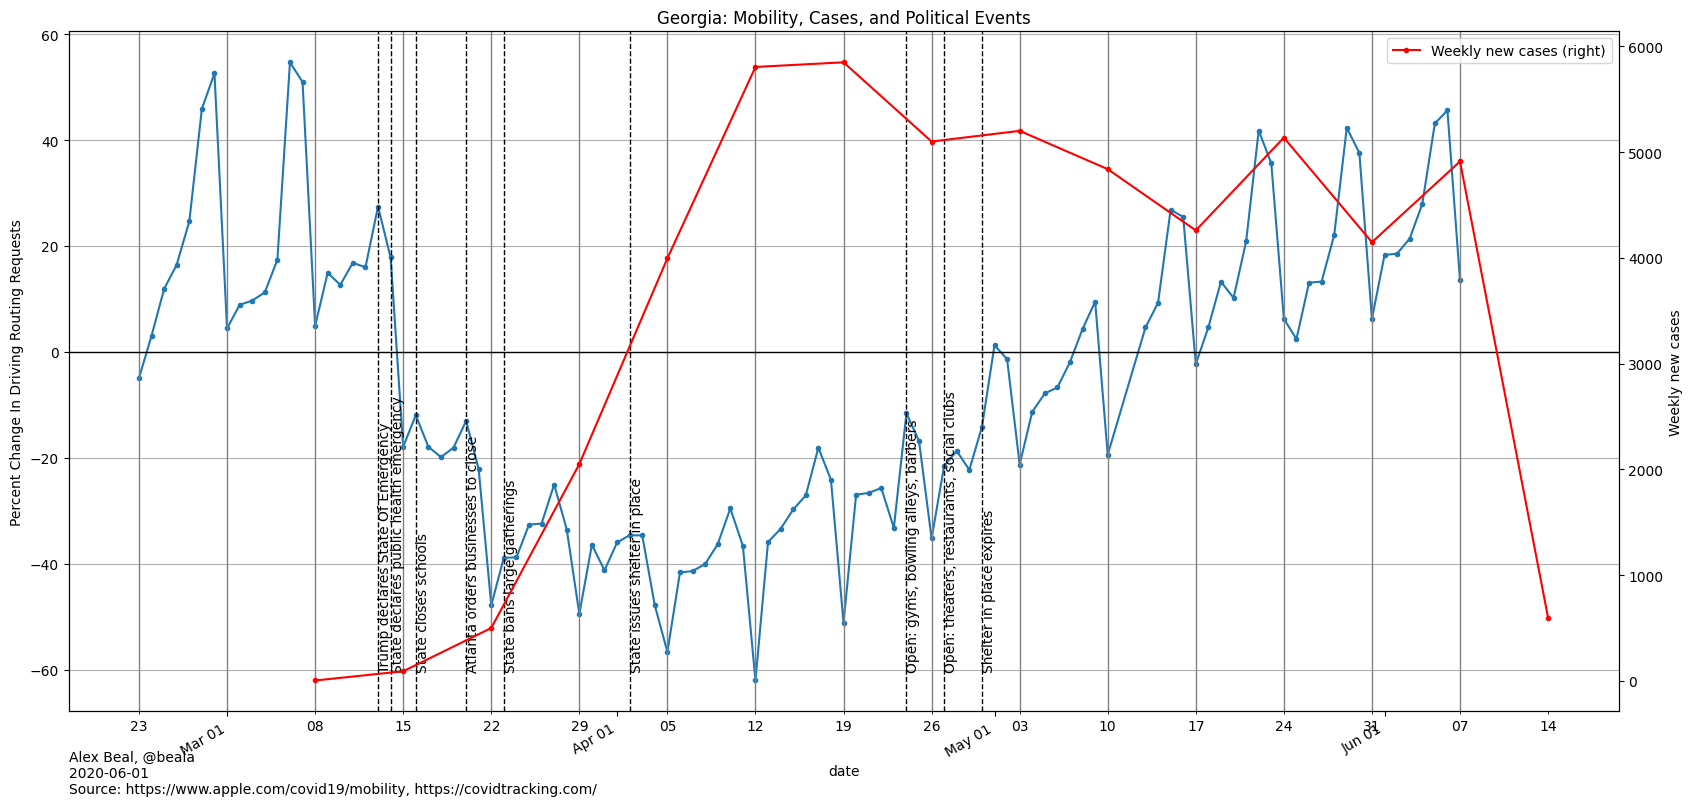

In [238]:
ga = mobility[(mobility['region'] == "Georgia") & (mobility.index >= pd.to_datetime('2020-02-23'))]['value'].copy().dropna()
ax = ga.plot(
        x_compat=True,
        figsize = (20,10),
        title = 'Georgia: Mobility, Cases, and Political Events',
        style='.-',
        label = "Mobility")

ax.set_xlabel("Date")
ax.set_ylabel("Percent Change In Driving Routing Requests")
ax.xaxis.set_major_locator(mdates.DayLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.SU))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))

ax2 = ga_tests['positiveIncrease'].groupby(pd.Grouper(freq='W-SUN')).sum().plot(
#ax2 = ga_tests['positiveIncrease'].rolling(7).mean().plot(
    figsize=(20,10),
    color="red",
    style='.-',
    x_compat=True,
    secondary_y=True,
    label="Weekly new cases",
    legend=True)
ax2.set_ylabel("Weekly new cases")

ax.grid(True, which='both', axis='y')
# Draw the darn grid lines myself by matplotlib is a dork
for xmin in mdates.WeekdayLocator(byweekday=mdates.SU).tick_values(pd.to_datetime('2020-02-23'), pd.to_datetime('2020-06-07')):
  ax.axvline(x=xmin, color='grey', linewidth=1)

ax.axhline(0, color='black', linewidth=1)
def event(date, label):
    ax.axvline(x=pd.to_datetime(date), color='black', linestyle='--', linewidth='1')
    ax.text(pd.to_datetime(date) - pd.to_timedelta('0 day'), -60, label, rotation=90, color='black')

event('2020-03-13', 'Trump declares State Of Emergency')
event('2020-03-14', 'State declares public health emergency')
event('2020-03-16', 'State closes schools')
event('2020-03-20', 'Atlanta orders businesses to close')
event('2020-03-23', 'State bans large gatherings')
event('2020-04-02', 'State issues shelter in place')
event('2020-04-24', 'Open: gyms, bowling alleys, barbers')
event('2020-04-27', 'Open: theaters, restaurants, social clubs')
event('2020-04-30', 'Shelter in place expires')

ax.text(
    -0.00,
    -0.12,
    "Alex Beal, @beala\n2020-06-01\nSource: https://www.apple.com/covid19/mobility, https://covidtracking.com/",
    transform=ax.transAxes
)
plt.savefig("ga_mobility.png")
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f01ab360d30>,
      dtype=object)

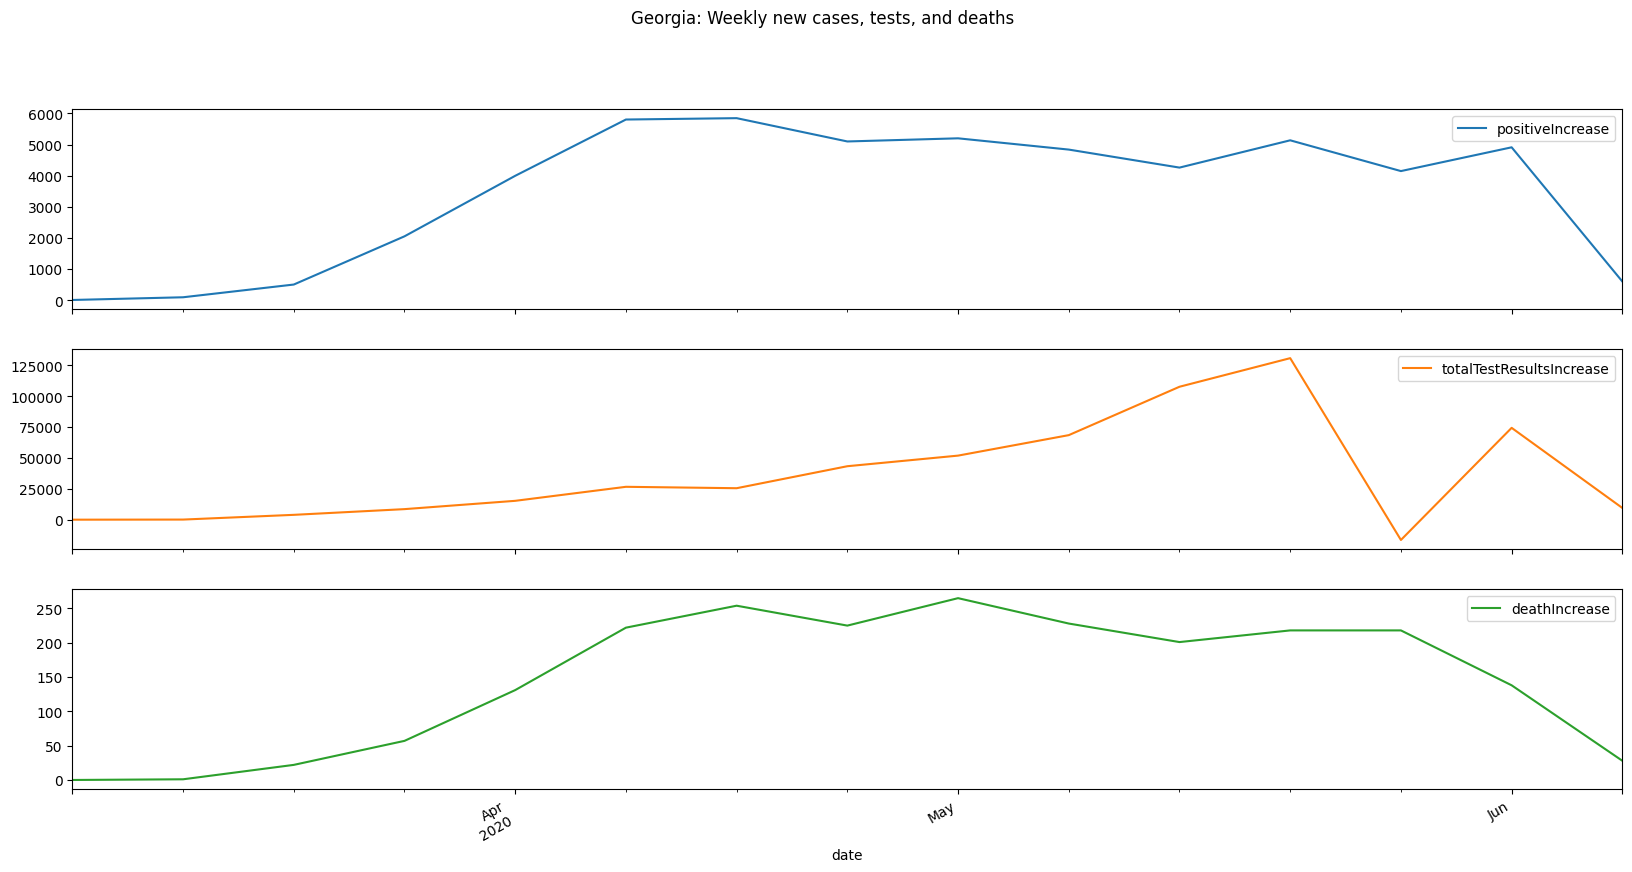

In [237]:
ga_tests.groupby(pd.Grouper(freq='W-SUN')).sum().plot(
    subplots=True,
    figsize=(20,10),
    title="Georgia: Weekly new cases, tests, and deaths")

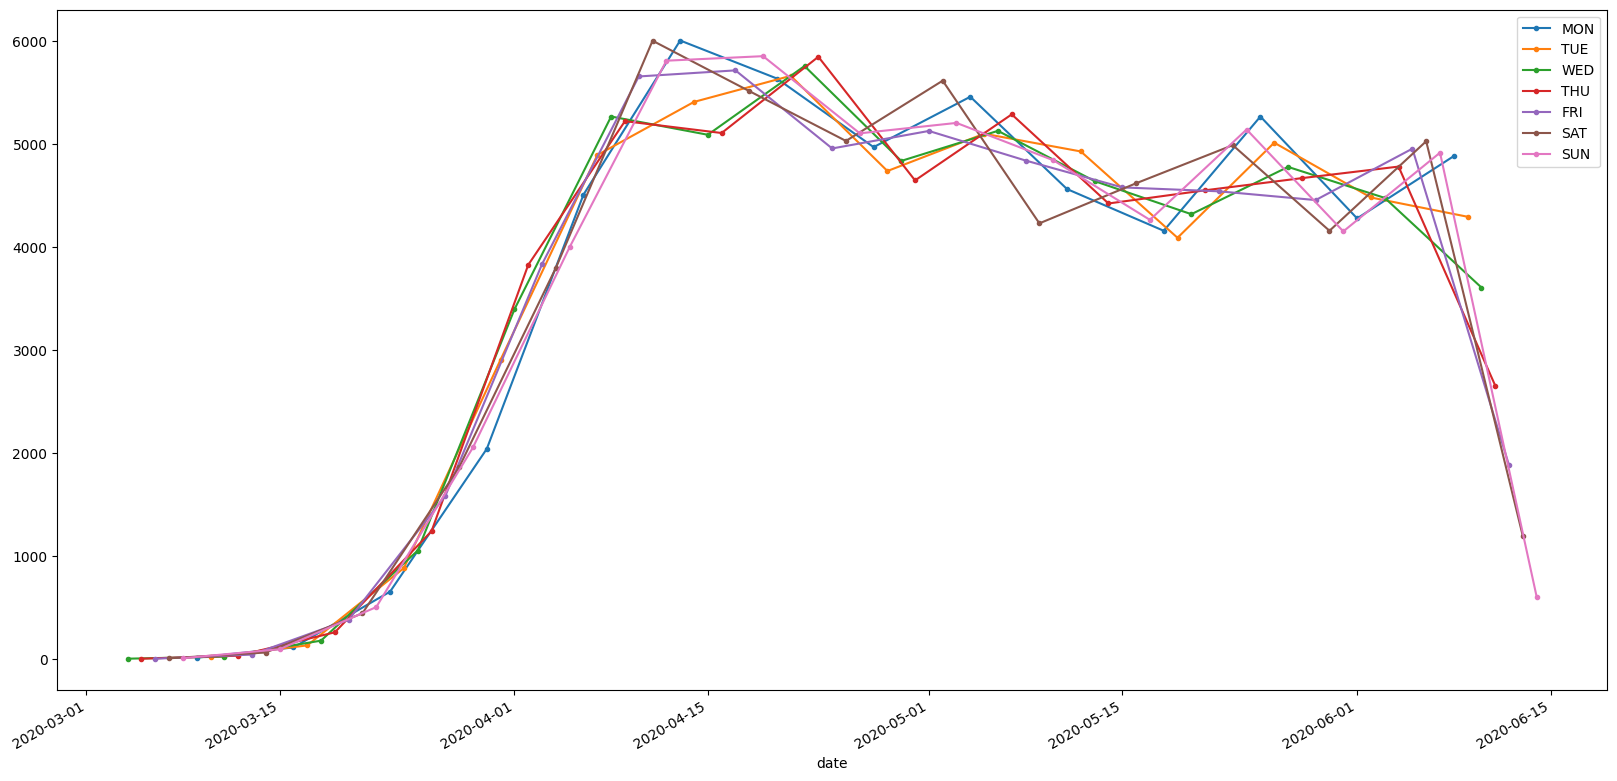

In [210]:
for d in ["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"]:
    ga_tests['positiveIncrease'].groupby(pd.Grouper(freq='W-{}'.format(d))).sum().plot(
        figsize=(20,10),
        style='.-',
        x_compat=True,
        label=d,
        legend=True)

In [646]:
states[states['state'] == 'PA'][['death']]

,death
date,
2020-03-06,NaN
2020-03-07,NaN
2020-03-08,NaN
2020-03-09,NaN
2020-03-10,NaN
...,...
2020-05-10,3707.0
2020-05-11,3731.0
2020-05-12,3806.0


In [647]:
pa_weekly = states[states['state'] == 'PA'][['deathIncrease']][:-1].groupby(pd.Grouper(freq='W-SAT')).sum()
pa_weekly

,deathIncrease
date,
2020-03-07,0.0
2020-03-14,0.0
2020-03-21,2.0
2020-03-28,32.0
2020-04-04,102.0
2020-04-11,358.0
2020-04-18,342.0
2020-04-25,701.0
2020-05-02,881.0


In [505]:
pa_weekly[-4:-1].mean()

deathIncrease    950.666667
dtype: float64

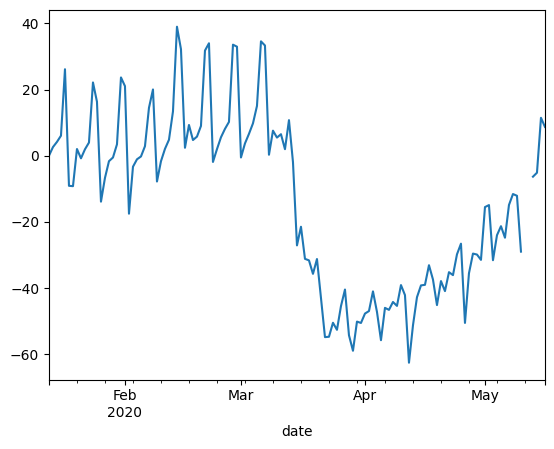

In [682]:
mobility[mobility['region'] == "Pennsylvania"]['value'].plot()

In [610]:
print(states[states['state'] == 'PA'][['death']].loc[pd.to_datetime('2020-05-09')])
states[states['state'] == 'PA'][['death']].loc[pd.to_datetime('2020-05-09')] + 700 * 5

death    3688.0
Name: 2020-05-09 00:00:00, dtype: float64


death    7188.0
Name: 2020-05-09 00:00:00, dtype: float64

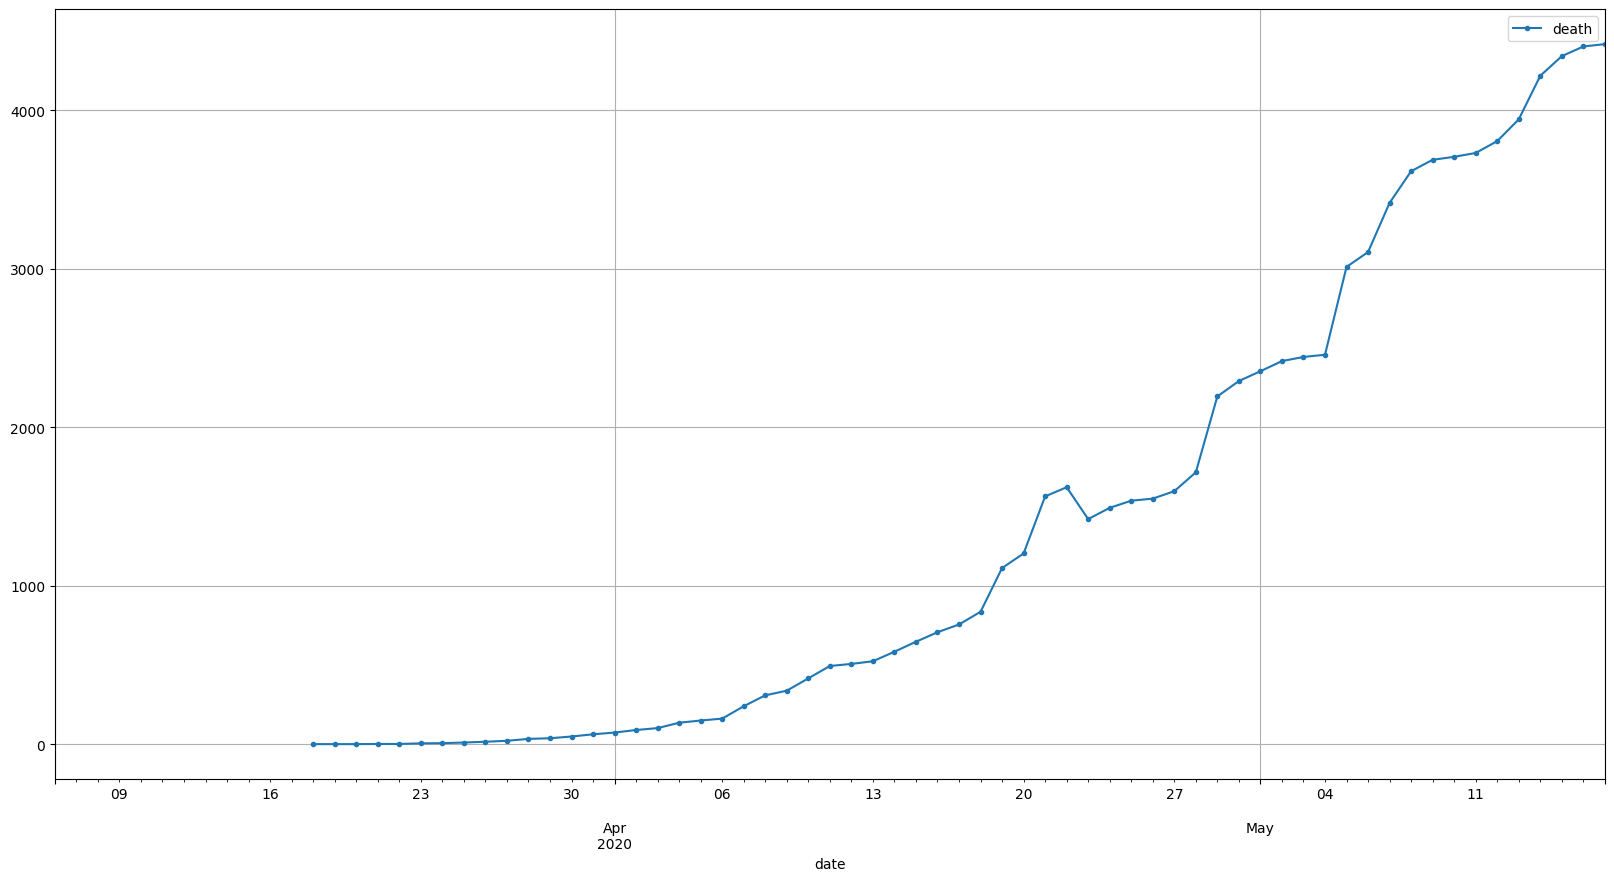

In [683]:
states[states['state'] == 'PA'][['death']].plot(
    figsize=(20,10),
    style=['.-'],
    grid=True)

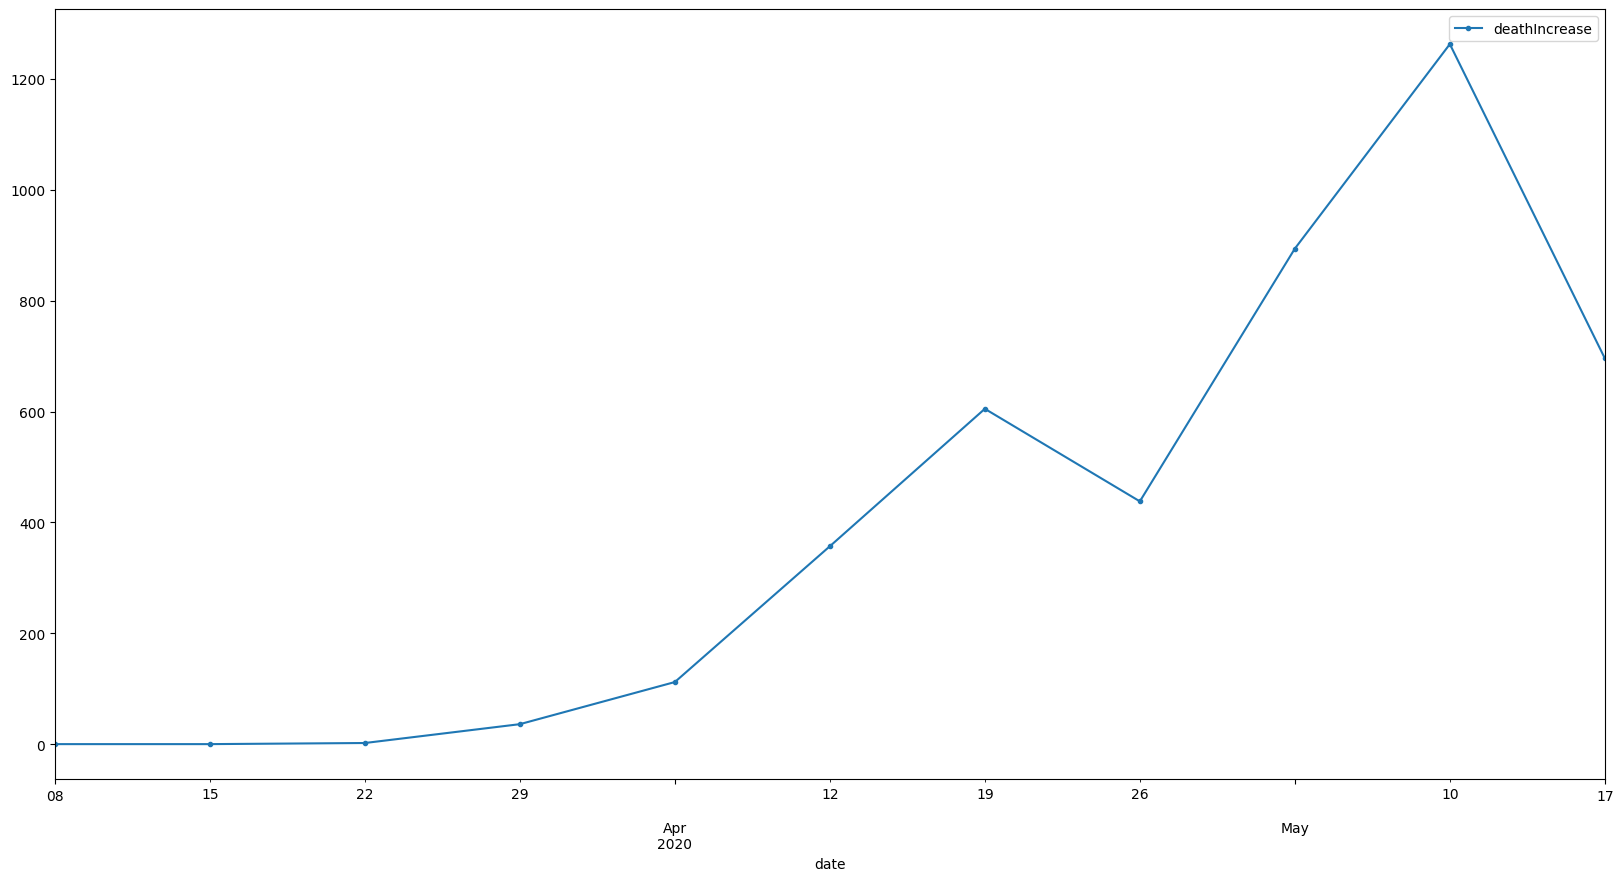

In [684]:
states[states['state'] == 'PA'][['deathIncrease']][:-1].groupby(pd.Grouper(freq='W-SUN')).sum().plot(
    figsize=(20,10),
    style=['.-'])

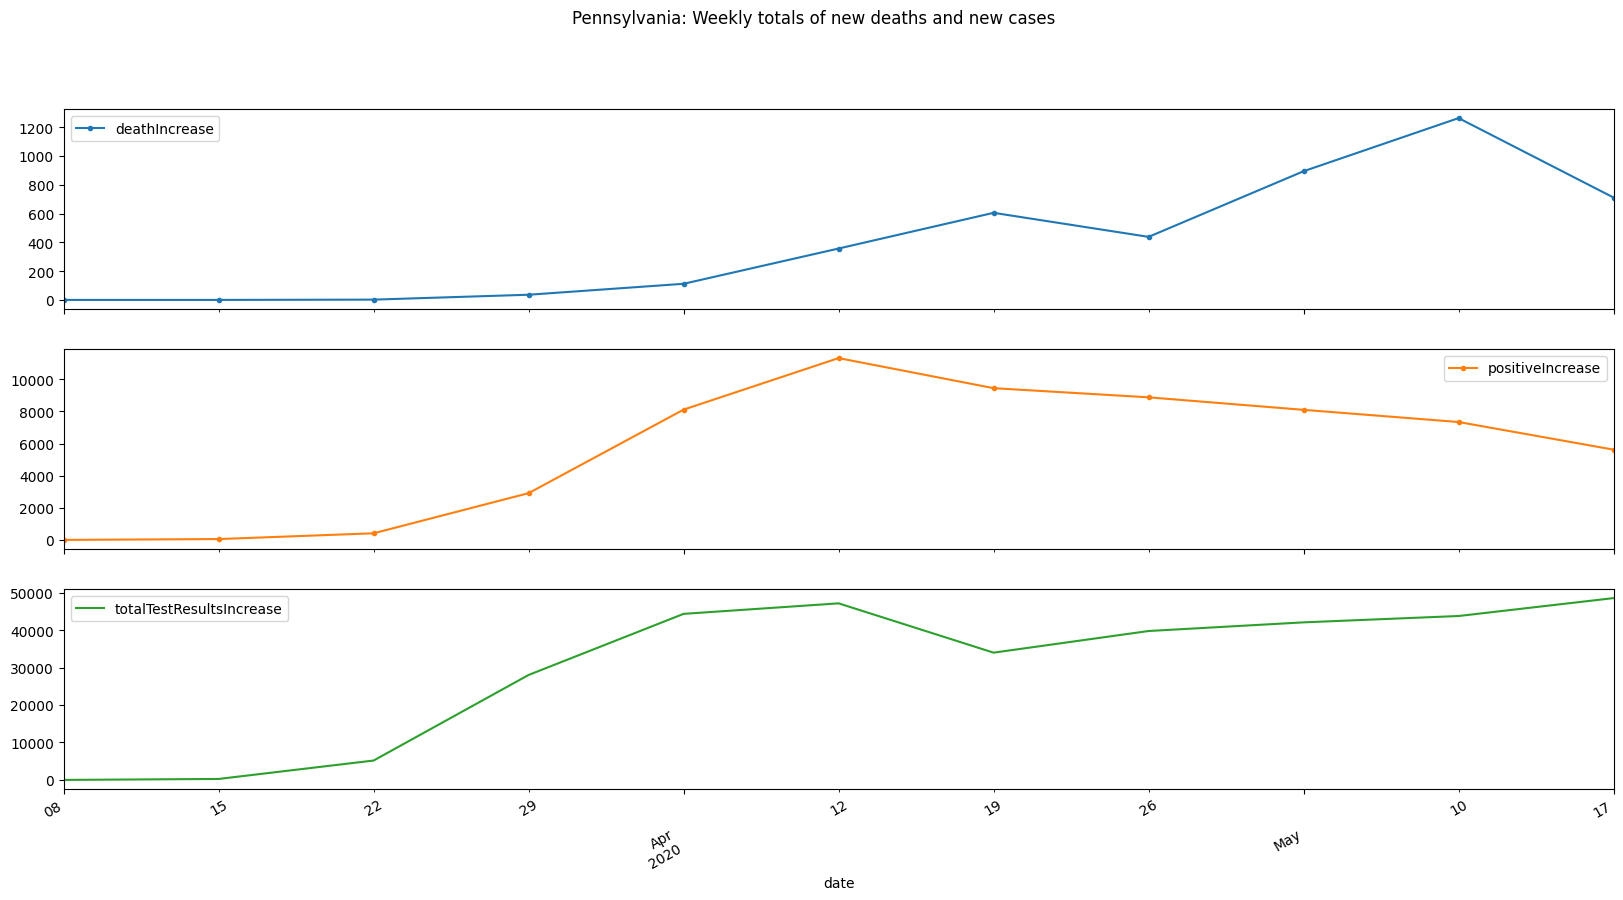

In [685]:
states[states['state'] == 'PA'][['deathIncrease','positiveIncrease', 'totalTestResultsIncrease']].groupby(pd.Grouper(freq='W-SUN')).sum()[:].plot(
    figsize=(20,10),
    style=['.-','.-'],
subplots=True,
title="Pennsylvania: Weekly totals of new deaths and new cases")

plt.savefig('lrt42-pa-weekly-deaths-cases.png')

In [686]:
states[states['state'] == 'PA'][['positiveIncrease', 'deathIncrease']].groupby(pd.Grouper(freq='W-SUN')).sum()[:-1]

,positiveIncrease,deathIncrease
date,,
2020-03-08,4.0,0.0
2020-03-15,57.0,0.0
2020-03-22,416.0,2.0
2020-03-29,2915.0,36.0
2020-04-05,8116.0,112.0
2020-04-12,11323.0,357.0
2020-04-19,9451.0,605.0
2020-04-26,8881.0,438.0
2020-05-03,8102.0,894.0


In [492]:
states[states['state'] == 'PA'][['positive']].loc[pd.to_datetime('2020-05-09')]

positive    55316.0
Name: 2020-05-09 00:00:00, dtype: float64

In [627]:
print((55316 + (8200*5)) * .065,(55316 + (8000*5)) * .07)

55316*0.065

6260.54 6672.120000000001


3595.54

In [606]:
55316 + (8000*5)

21640/337000

0.06421364985163205

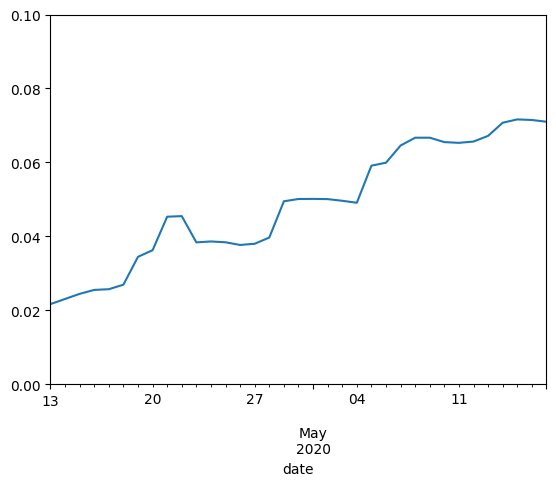

In [687]:
pa = states[states['state'] == 'PA']

(pa['death']/pa['positive'])[-35:].plot(ylim=(0,0.1))

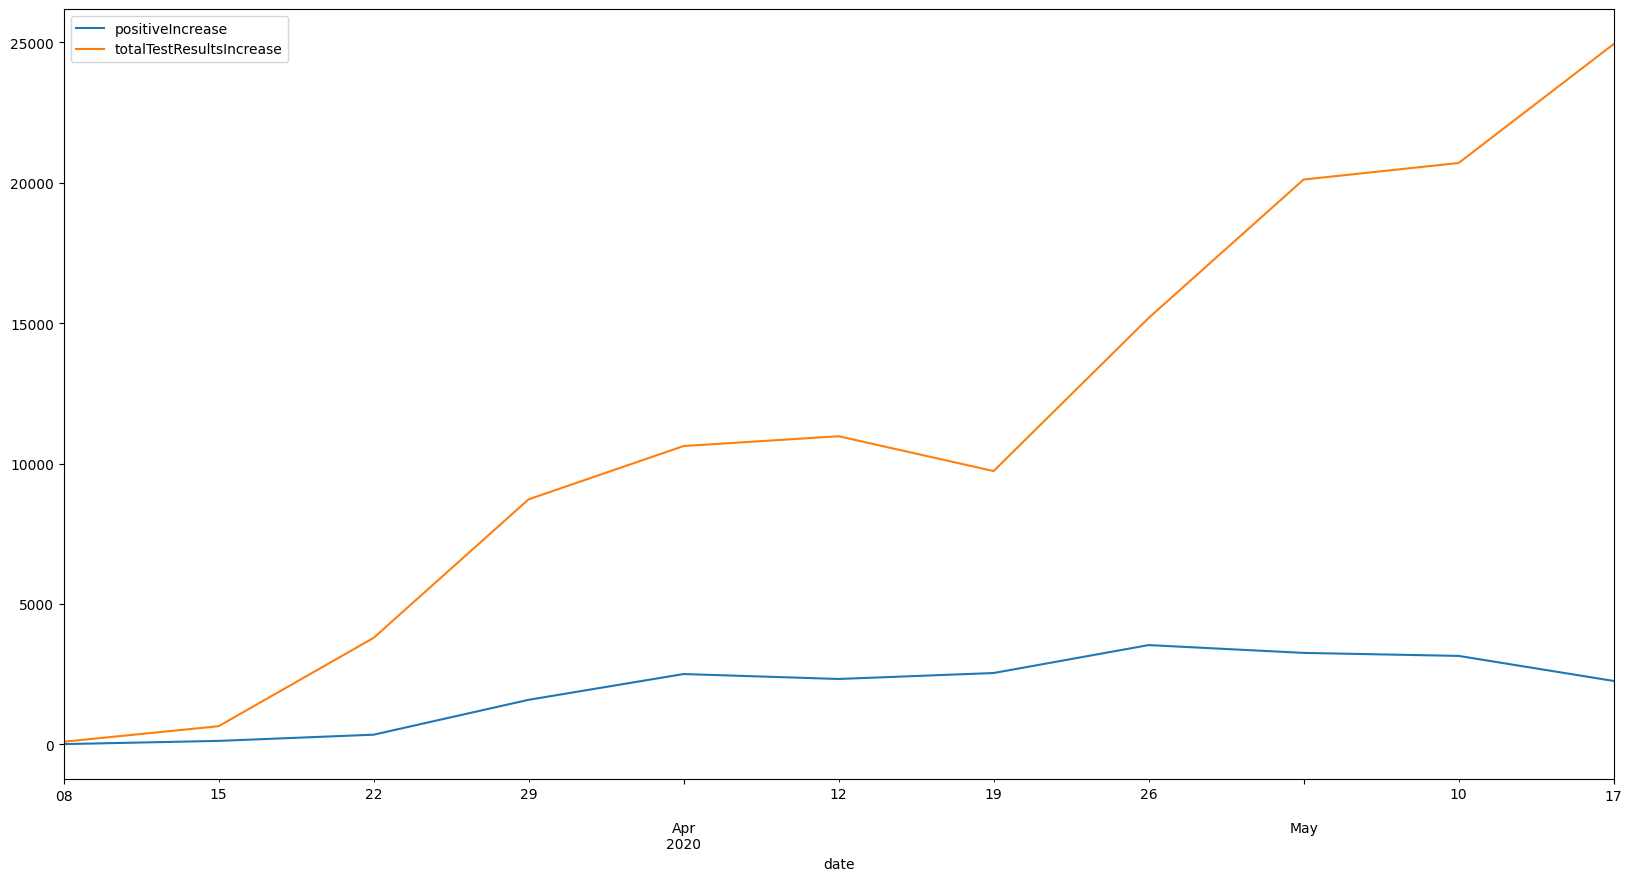

In [689]:
states[states['state'] == 'CO'][['positiveIncrease', 'totalTestResultsIncrease']].groupby(pd.Grouper(freq='W-SUN')).sum().plot(figsize=(20,10))

In [690]:
ga_p = ga_positives.groupby(pd.Grouper(freq='W-SUN')).sum()

ga

date
2020-03-01     4.44
2020-03-02     8.88
2020-03-03     9.70
2020-03-04    11.23
2020-03-05    17.40
              ...  
2020-05-10   -19.40
2020-05-13     4.61
2020-05-14     9.28
2020-05-15    26.85
2020-05-16    25.49
Name: value, Length: 75, dtype: float64

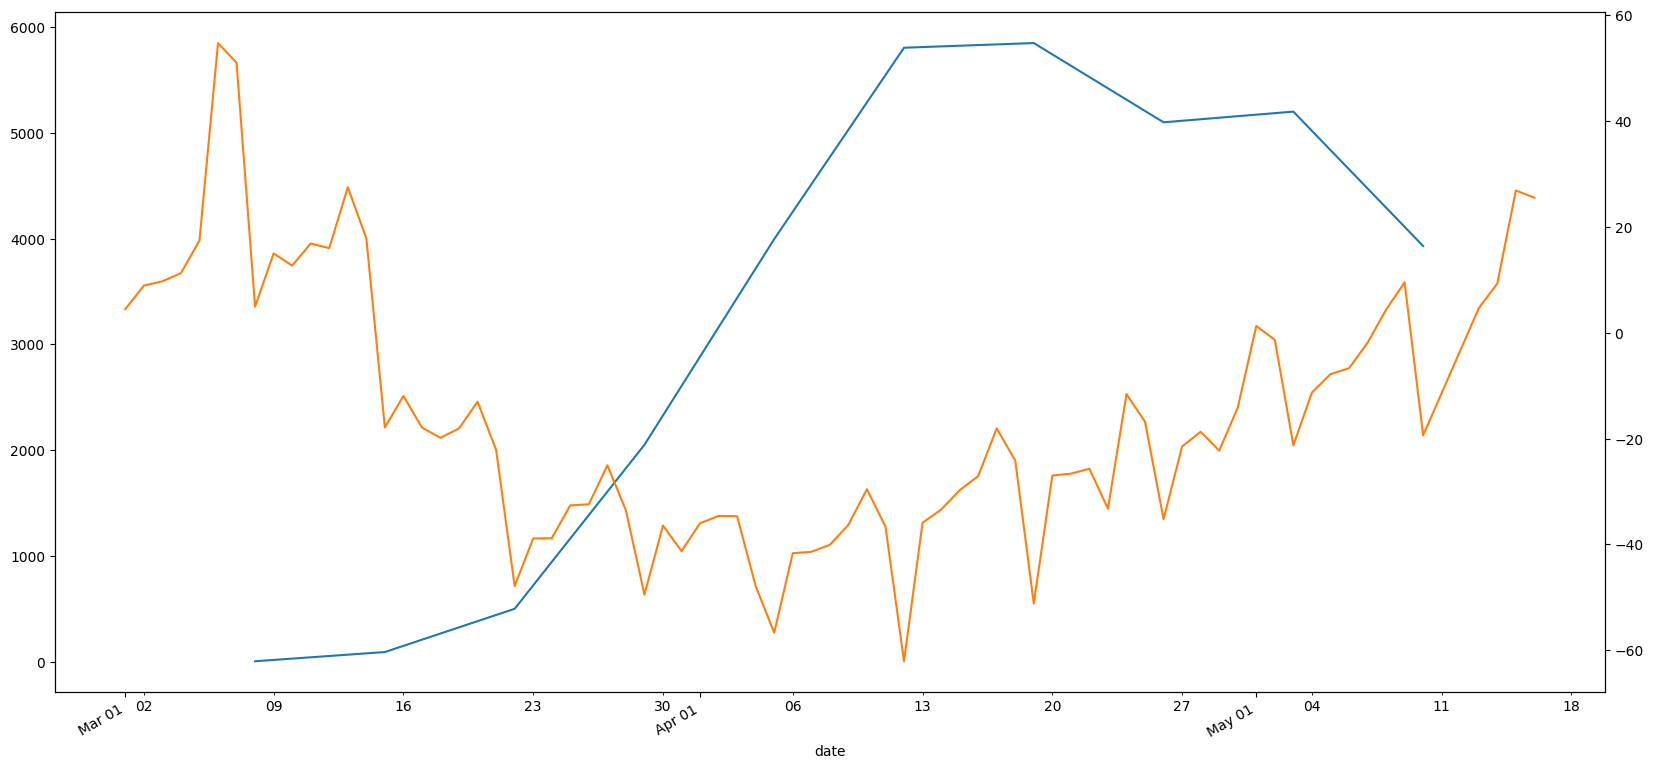

In [691]:
plt.figure()
ax = ga_p.plot(x_compat=True,figsize=(20,10))
for a in [ax]:
    a.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    a.xaxis.set_major_locator(mdates.DayLocator(1))
    a.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
    a.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))
ax2 = ga.plot(x_compat=True, secondary_y=True, figsize=(20,10))
    
plt.show()

#plt.grid(which='both')

#ax.xaxis.set_minor_locator(mdates.DayLocator())
#ax.xaxis.set_major_locator(mdates.DayLocator(1))
#ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [234]:
!cal 2020
ga_positives.groupby(pd.Grouper(freq='W-MON')).sum()

                            2020
      January               February               March          
Su Mo Tu We Th Fr Sa  Su Mo Tu We Th Fr Sa  Su Mo Tu We Th Fr Sa  
          1  2  3  4                     1   1  2  3  4  5  6  7  
 5  6  7  8  9 10 11   2  3  4  5  6  7  8   8  9 10 11 12 13 14  
12 13 14 15 16 17 18   9 10 11 12 13 14 15  15 16 17 18 19 20 21  
19 20 21 22 23 24 25  16 17 18 19 20 21 22  22 23 24 25 26 27 28  
26 27 28 29 30 31     23 24 25 26 27 28 29  29 30 31              
                                                                  

       April                  May                   June          
Su Mo Tu We Th Fr Sa  Su Mo Tu We Th Fr Sa  Su Mo Tu We Th Fr Sa  
          1  2  3  4                  1  2      1  2  3  4  5  6  
 5  6  7  8  9 10 11   3  4  5  6  7  8  9   7  8  9 10 11 12 13  
12 13 14 15 16 17 18  10 11 12 13 14 15 16  14 15 16 17 18 19 20  
19 20 21 22 23 24 25  17 18 19 20 21 22 23  21 22 23 24 25 26 27  
26 27 28 29 30        24 25 

date
2020-03-09      10.0
2020-03-16     109.0
2020-03-23     651.0
2020-03-30    2037.0
2020-04-06    4505.0
2020-04-13    6001.0
2020-04-20    5632.0
2020-04-27    4966.0
2020-05-04    5455.0
2020-05-11    3164.0
Freq: W-MON, Name: positiveIncrease, dtype: float64

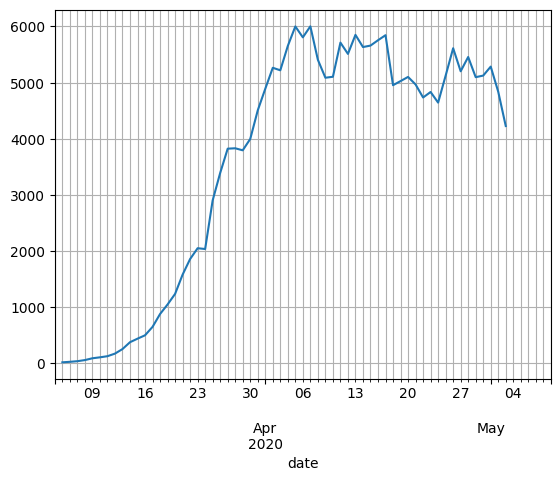

In [692]:
ax = ga_positives.rolling(7).sum().plot()
plt.grid(which='both')

In [217]:
ga_positives

date
2020-05-09    426.0
2020-05-08    667.0
2020-05-07    743.0
2020-05-06    985.0
2020-05-05    343.0
              ...  
2020-03-07      4.0
2020-03-06      0.0
2020-03-05      0.0
2020-03-04      NaN
2020-03-01      0.0
Name: positiveIncrease, Length: 68, dtype: float64

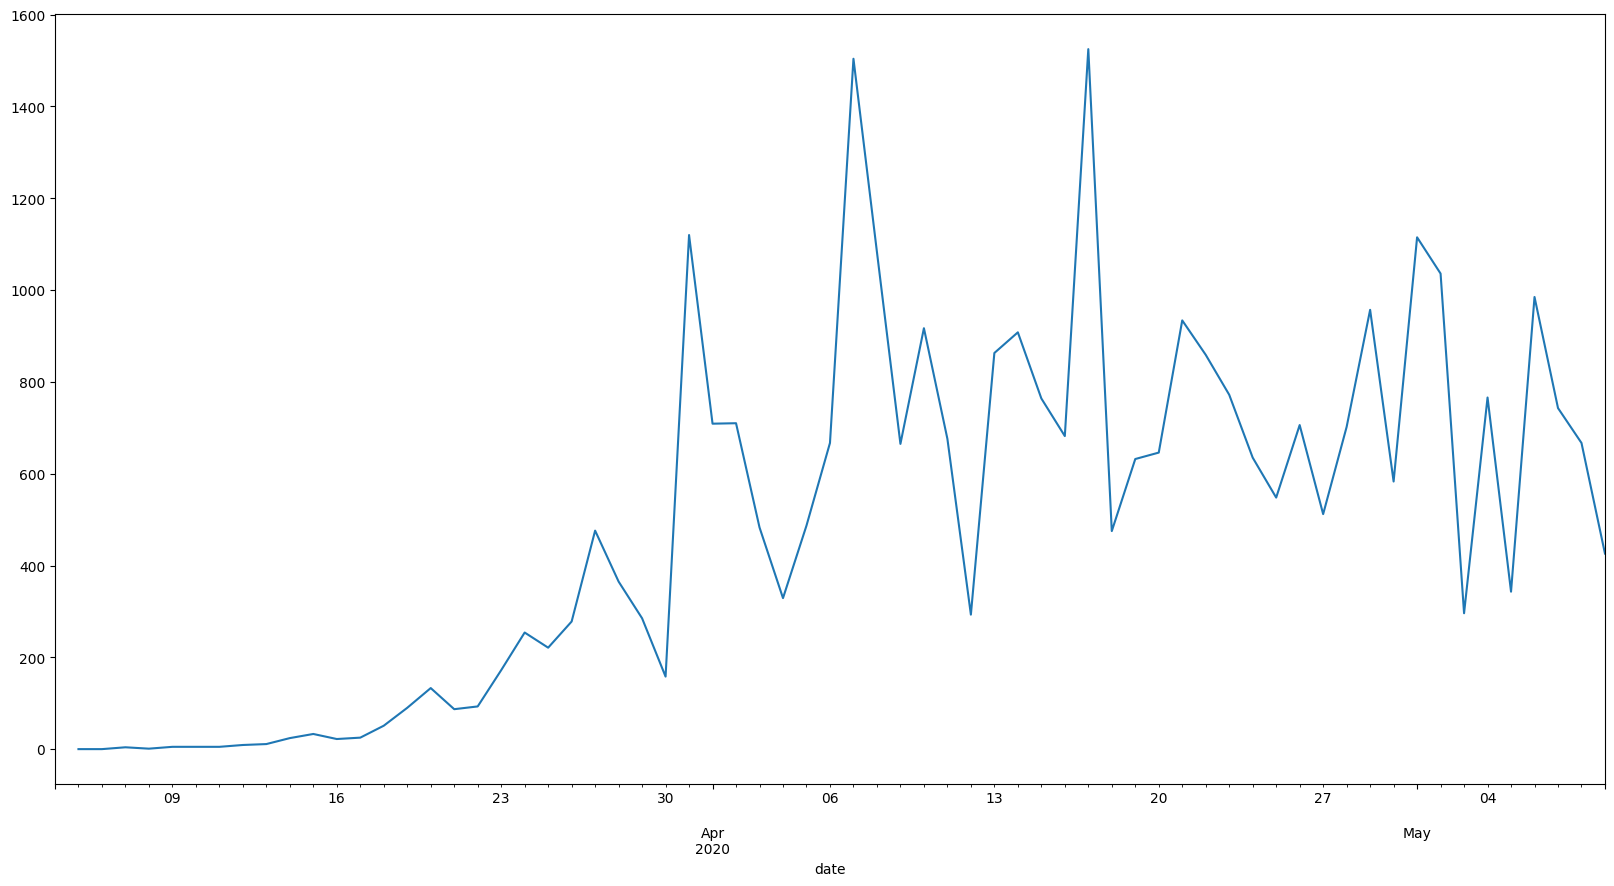

In [177]:
states[states['state'] == 'GA']['positiveIncrease'].plot(
    figsize=(20,10))

In [413]:
!ls ../covid-tracking-data/data
us = pd.read_csv("../covid-tracking-data/data/us_daily.csv", parse_dates = ['date'], index_col = 'date')[::-1]
us

counties.csv	    states_daily_4pm_et.csv  us_current.csv
states_current.csv  states_info.csv	     us_daily.csv


,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,0.0,0.0,0.0,0.0,0.0
2020-01-24,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,0.0,0.0,0.0,0.0,0.0
2020-01-25,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,0.0,0.0,0.0,0.0,0.0
2020-01-26,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-07,56,1248137,6857376.0,3171.0,49130.0,135176.0,12137.0,5174.0,7070.0,529.0,...,135176.0,8108684,8105513,8105513,NaN,2746.0,3699.0,291140.0,27580.0,318720.0
2020-05-08,56,1275916,7132872.0,3307.0,47718.0,142037.0,11780.0,6294.0,6788.0,531.0,...,142037.0,8412095,8408788,8408788,NaN,1760.0,6861.0,275496.0,27779.0,303275.0
2020-05-09,56,1301095,7408535.0,3054.0,46637.0,147212.0,11496.0,6367.0,6551.0,543.0,...,147212.0,8712684,8709630,8709630,NaN,1529.0,5175.0,275663.0,25179.0,300842.0


In [420]:
us_weekly = us[['positiveIncrease', 'totalTestResultsIncrease']][:-1].groupby(pd.Grouper(freq='W-SUN')).sum()
us_weekly

,positiveIncrease,totalTestResultsIncrease
date,,
2020-01-26,0.0,0.0
2020-02-02,0.0,0.0
2020-02-09,1.0,1.0
2020-02-16,0.0,0.0
2020-02-23,0.0,0.0
2020-03-01,38.0,119.0
2020-03-08,681.0,4503.0
2020-03-15,4121.0,34324.0
2020-03-22,31492.0,210821.0


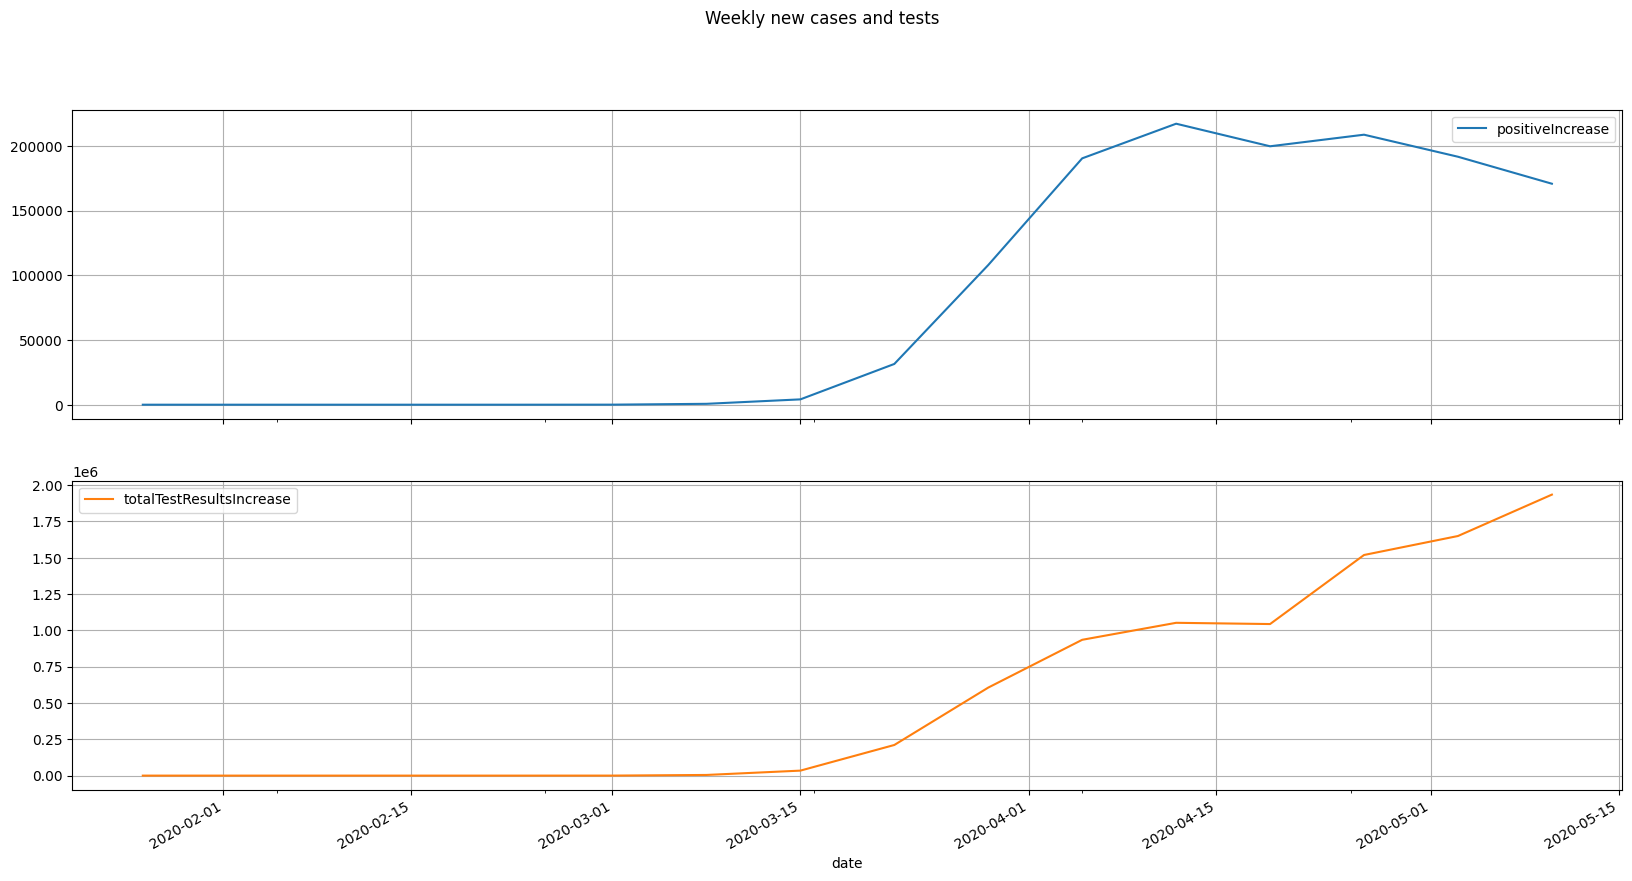

In [444]:
us_weekly.plot(
    grid=True,
    figsize=(20,10),
    x_compat=True,
    subplots=True,
    title="Weekly new cases and tests")

plt.savefig("lrt41.png")

In [439]:
weeks_back = 4
print(us_weekly[-weeks_back:])
per_day = us_weekly[-weeks_back:].mean()/7
per_day

            positiveIncrease  totalTestResultsIncrease
date                                                  
2020-04-19          199740.0                 1043264.0
2020-04-26          208697.0                 1518551.0
2020-05-03          191663.0                 1649229.0
2020-05-10          170801.0                 1934158.0


positiveIncrease             27532.178571
totalTestResultsIncrease    219471.500000
dtype: float64

In [442]:
print(us['positive'][pd.to_datetime('2020-05-10')])
per_day * 7 + us['positive'][pd.to_datetime('2020-05-10')]

1322807


positiveIncrease            1515532.25
totalTestResultsIncrease    2859107.50
dtype: float64

In [432]:
1322807+192725

1515532

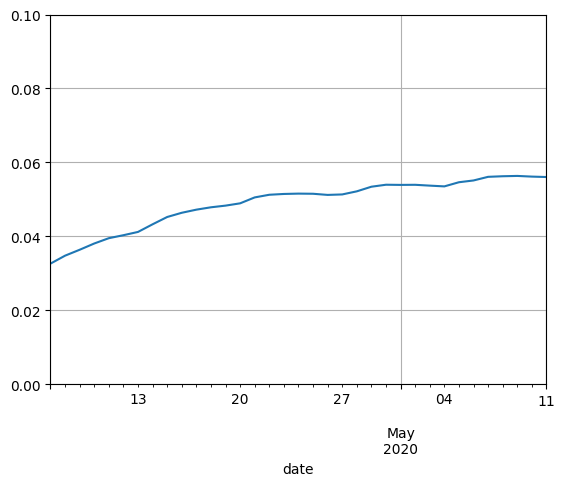

In [549]:
(us['death']/us['positive'])[-35:].plot(ylim=(0,0.1), grid=True)

In [539]:
(us['death']/us['positive'])[-35:]

date
2020-04-07    0.032602
2020-04-08    0.034753
2020-04-09    0.036353
2020-04-10    0.038046
2020-04-11    0.039485
2020-04-12    0.040291
2020-04-13    0.041177
2020-04-14    0.043242
2020-04-15    0.045218
2020-04-16    0.046360
2020-04-17    0.047203
2020-04-18    0.047844
2020-04-19    0.048294
2020-04-20    0.048915
2020-04-21    0.050517
2020-04-22    0.051234
2020-04-23    0.051452
2020-04-24    0.051544
2020-04-25    0.051504
2020-04-26    0.051194
2020-04-27    0.051322
2020-04-28    0.052162
2020-04-29    0.053411
2020-04-30    0.053948
2020-05-01    0.053902
2020-05-02    0.053930
2020-05-03    0.053705
2020-05-04    0.053500
2020-05-05    0.054623
2020-05-06    0.055103
2020-05-07    0.056085
2020-05-08    0.056244
2020-05-09    0.056330
2020-05-10    0.056146
2020-05-11    0.056033
dtype: float64

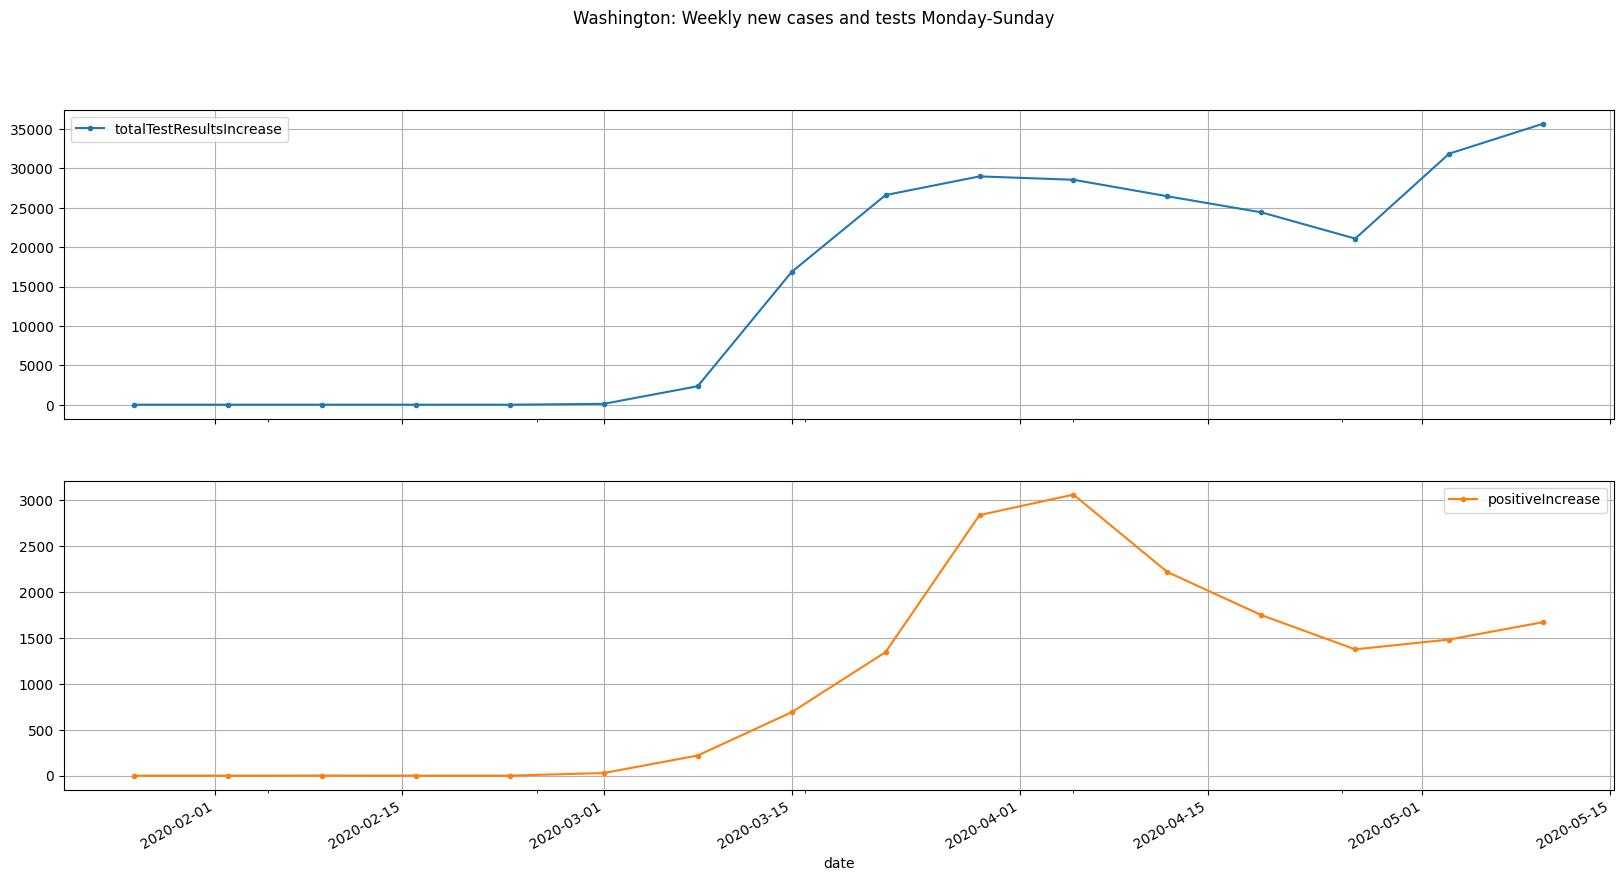

In [587]:
states[states['state'] == 'WA'][['totalTestResultsIncrease','positiveIncrease']].groupby(pd.Grouper(freq='W-SUN')).sum()[:-1].plot(
grid=True,
figsize=(20,10),
subplots=True,
x_compat=True,
style=['.-','.-'],
title="Washington: Weekly new cases and tests Monday-Sunday")

plt.savefig('lrt43_weekly_cases_and_tests.png')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bc78f52b0>,
      dtype=object)

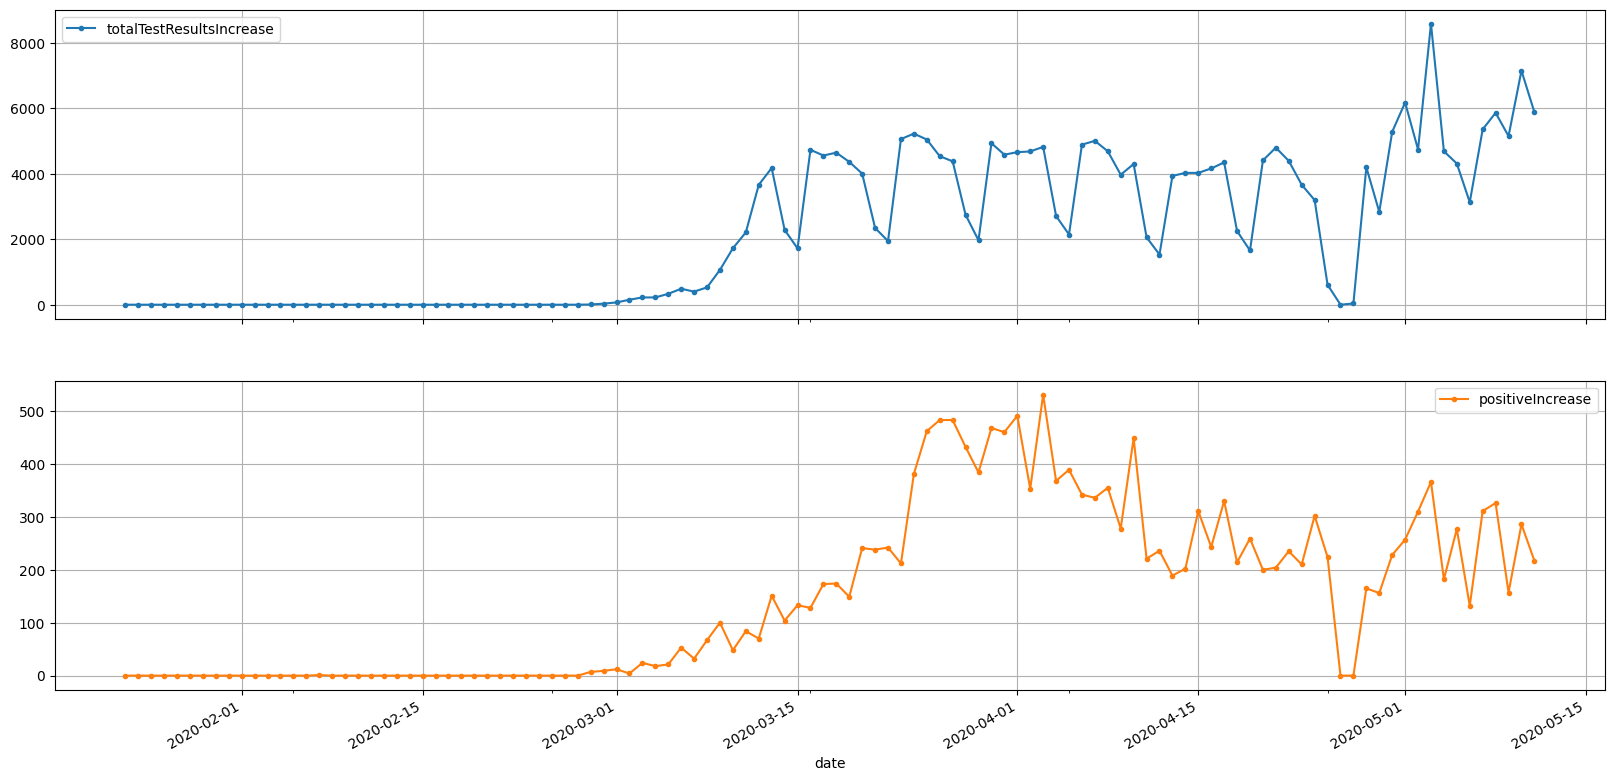

In [570]:
states[states['state'] == 'WA'][['totalTestResultsIncrease','positiveIncrease']].plot(
grid=True,
figsize=(20,10),
subplots=True,
x_compat=True,
style=['.-','.-'])

In [580]:
states[states['state'] == 'WA'][['totalTestResultsIncrease','positiveIncrease']].groupby(pd.Grouper(freq='W-SUN')).sum()[-2:-1].mean()/7

totalTestResultsIncrease    5096.285714
positiveIncrease             238.714286
dtype: float64

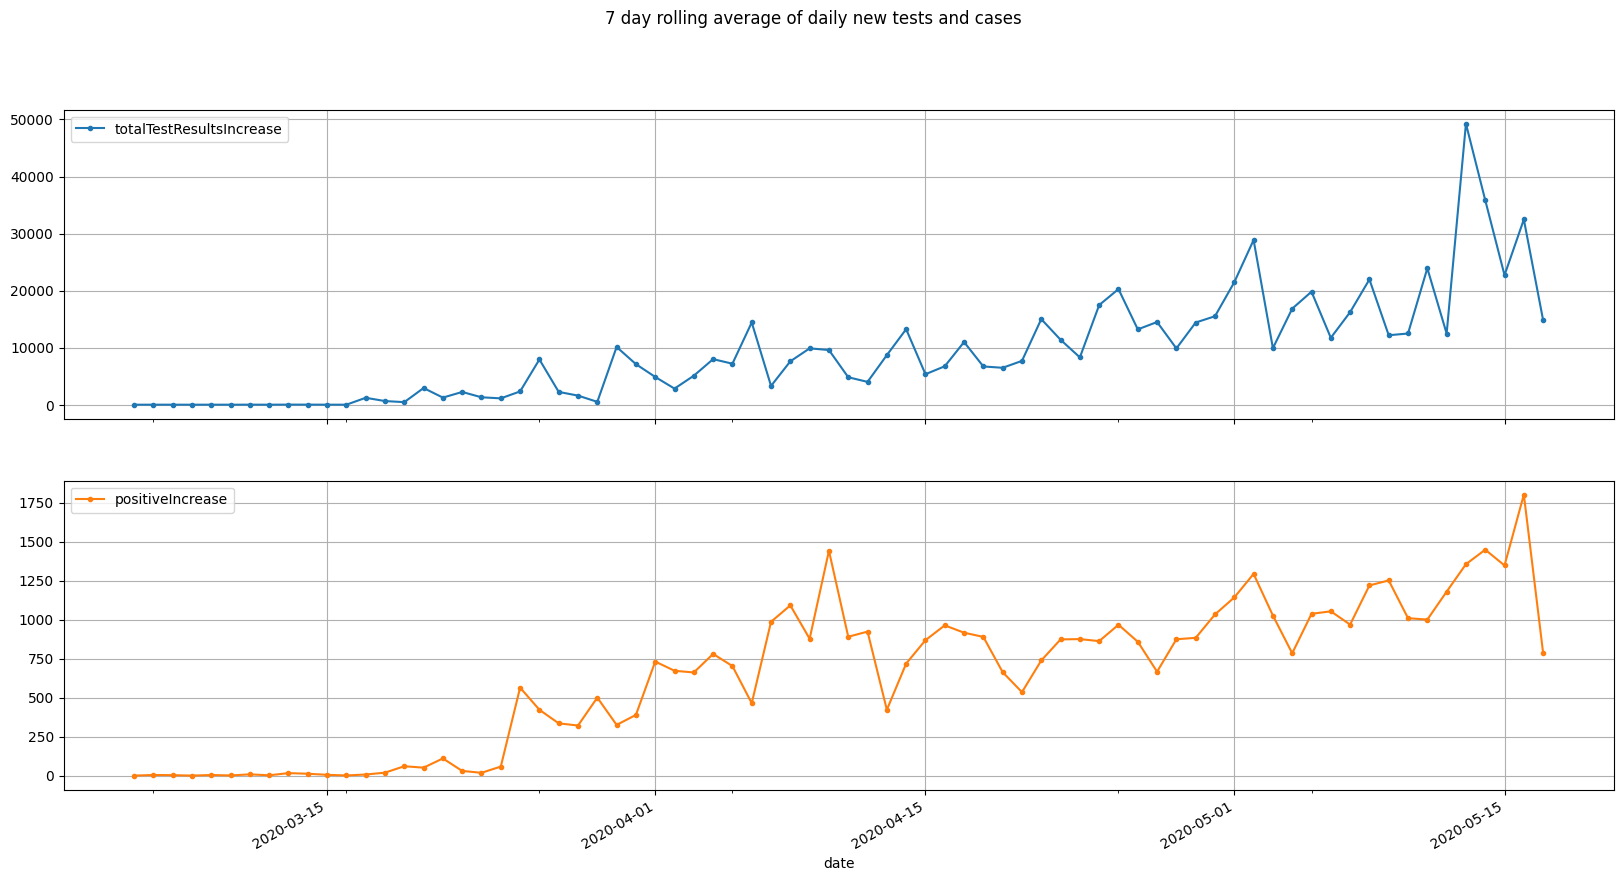

In [695]:
states[states['state'] == 'TX'][['totalTestResultsIncrease','positiveIncrease']].plot(
grid=True,
figsize=(20,10),
subplots=True,
x_compat=True,
style=['.-','.-'],
title="7 day rolling average of daily new tests and cases")

plt.savefig('lrt43_daily_wa_rolling_average.png')

In [563]:
states[states['state'] == 'WA'][['totalTestResultsIncrease','positiveIncrease']].groupby(pd.Grouper(freq='W-SUN')).sum()

,totalTestResultsIncrease,positiveIncrease
date,,
2020-01-26,0.0,0.0
2020-02-02,0.0,0.0
2020-02-09,1.0,1.0
2020-02-16,0.0,0.0
2020-02-23,0.0,0.0
2020-03-01,109.0,28.0
2020-03-08,2346.0,219.0
2020-03-15,16854.0,690.0
2020-03-22,26613.0,1345.0


In [4]:
!ls ../covid-tracking-data/data
us_daily = pd.read_csv("../covid-tracking-data/data/us_daily.csv", index_col="date", parse_dates=["date"])[::-1]
us_daily

cdc.csv       states_current.csv       states_info.csv	us_daily.csv
counties.csv  states_daily_4pm_et.csv  us_current.csv


,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,0.0,0.0,0.0,0.0,0.0
2020-01-24,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,0.0,0.0,0.0,0.0,0.0
2020-01-25,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,0.0,0.0,0.0,0.0,0.0
2020-01-26,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-18,56,1500312,10305709.0,3596.0,40933.0,157963.0,10015.0,7064.0,5257.0,602.0,...,157963.0,11809617,11806021,11806021,NaN,786.0,1058.0,325863.0,19839.0,345702.0
2020-05-19,56,1521252,10681560.0,2944.0,41174.0,159634.0,9829.0,7217.0,5032.0,606.0,...,159634.0,12205756,12202812,12202812,NaN,1430.0,1671.0,375851.0,20940.0,396791.0
2020-05-20,56,1542594,11065622.0,2973.0,40884.0,161616.0,9829.0,7319.0,4911.0,613.0,...,161616.0,12611189,12608216,12608216,NaN,1402.0,1982.0,384062.0,21342.0,405404.0


In [7]:
!ls ../covid-tracking-data/data/states_daily_4pm_et.csv
states = pd.read_csv("../covid-tracking-data/data/states_daily_4pm_et.csv", parse_dates = ['date'], index_col = 'date')[::-1]
states

../covid-tracking-data/data/states_daily_4pm_et.csv


,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,NaN,NaN,NaN,NaN,NaN
2020-01-23,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
2020-01-24,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
2020-01-25,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
2020-01-26,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-22,AZ,15608.0,160395.0,NaN,796.0,1879.0,311.0,NaN,203.0,NaN,...,1879.0,176003,176003,176003,4,12.0,49.0,4083.0,293.0,4376.0
2020-05-22,AS,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,124,124,124,60,0.0,0.0,0.0,0.0,0.0
2020-05-22,AR,5612.0,97435.0,NaN,86.0,584.0,NaN,NaN,14.0,110.0,...,584.0,103047,103047,103047,5,3.0,49.0,3617.0,154.0,3771.0


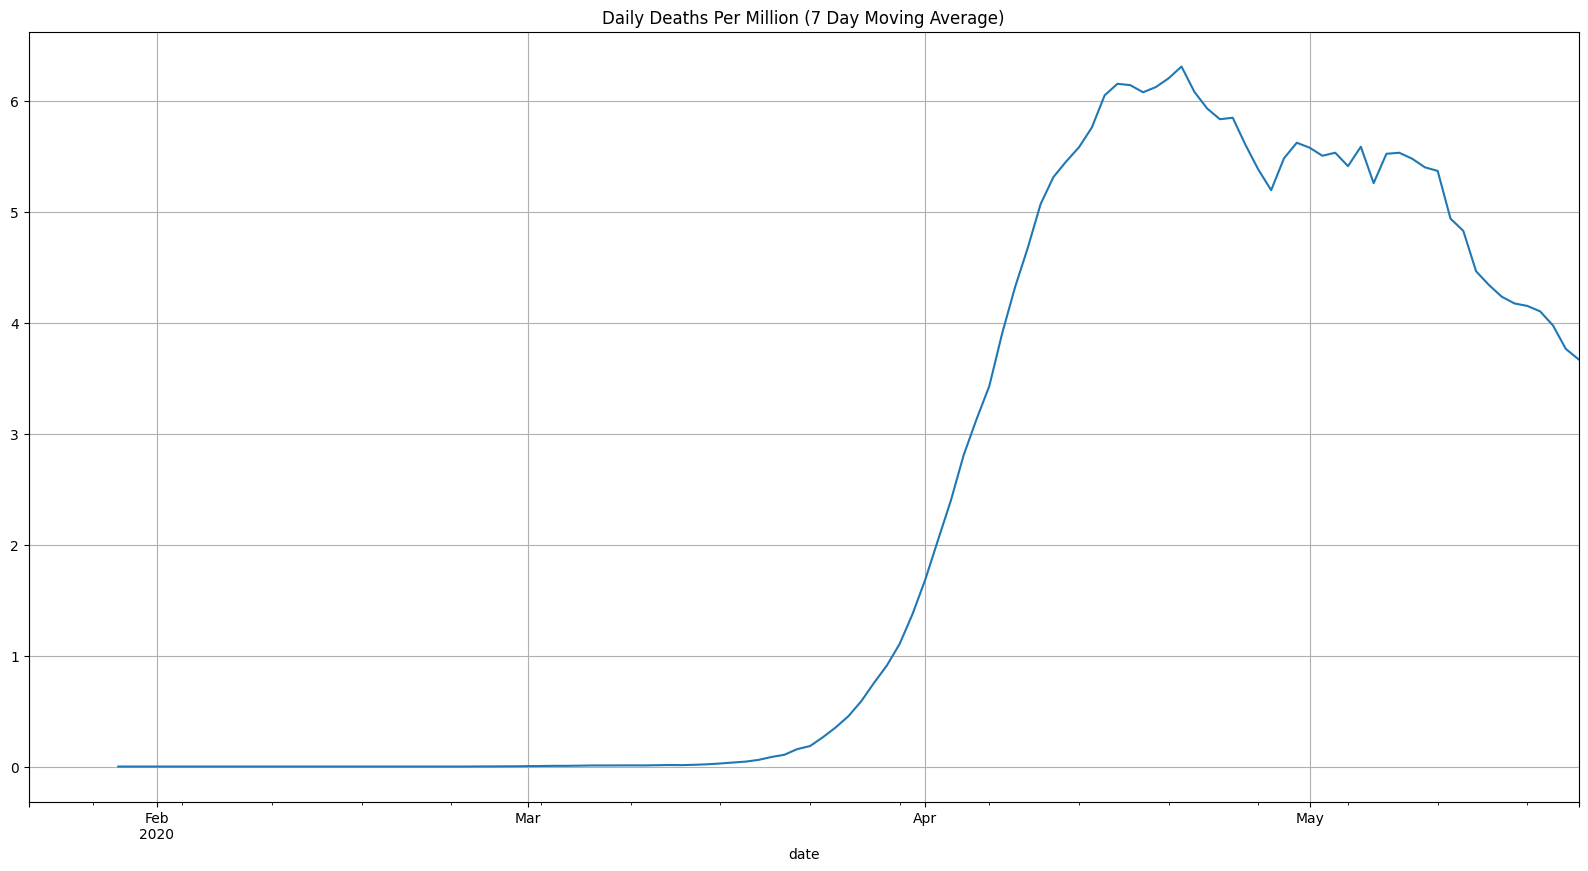

In [8]:
(us_daily['deathIncrease'] / 328.2).rolling(7).mean().plot(
    grid=True,
    title="Daily Deaths Per Million (7 Day Moving Average)",
    figsize=(20,10)
)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01bebf36d8>,
      dtype=object)

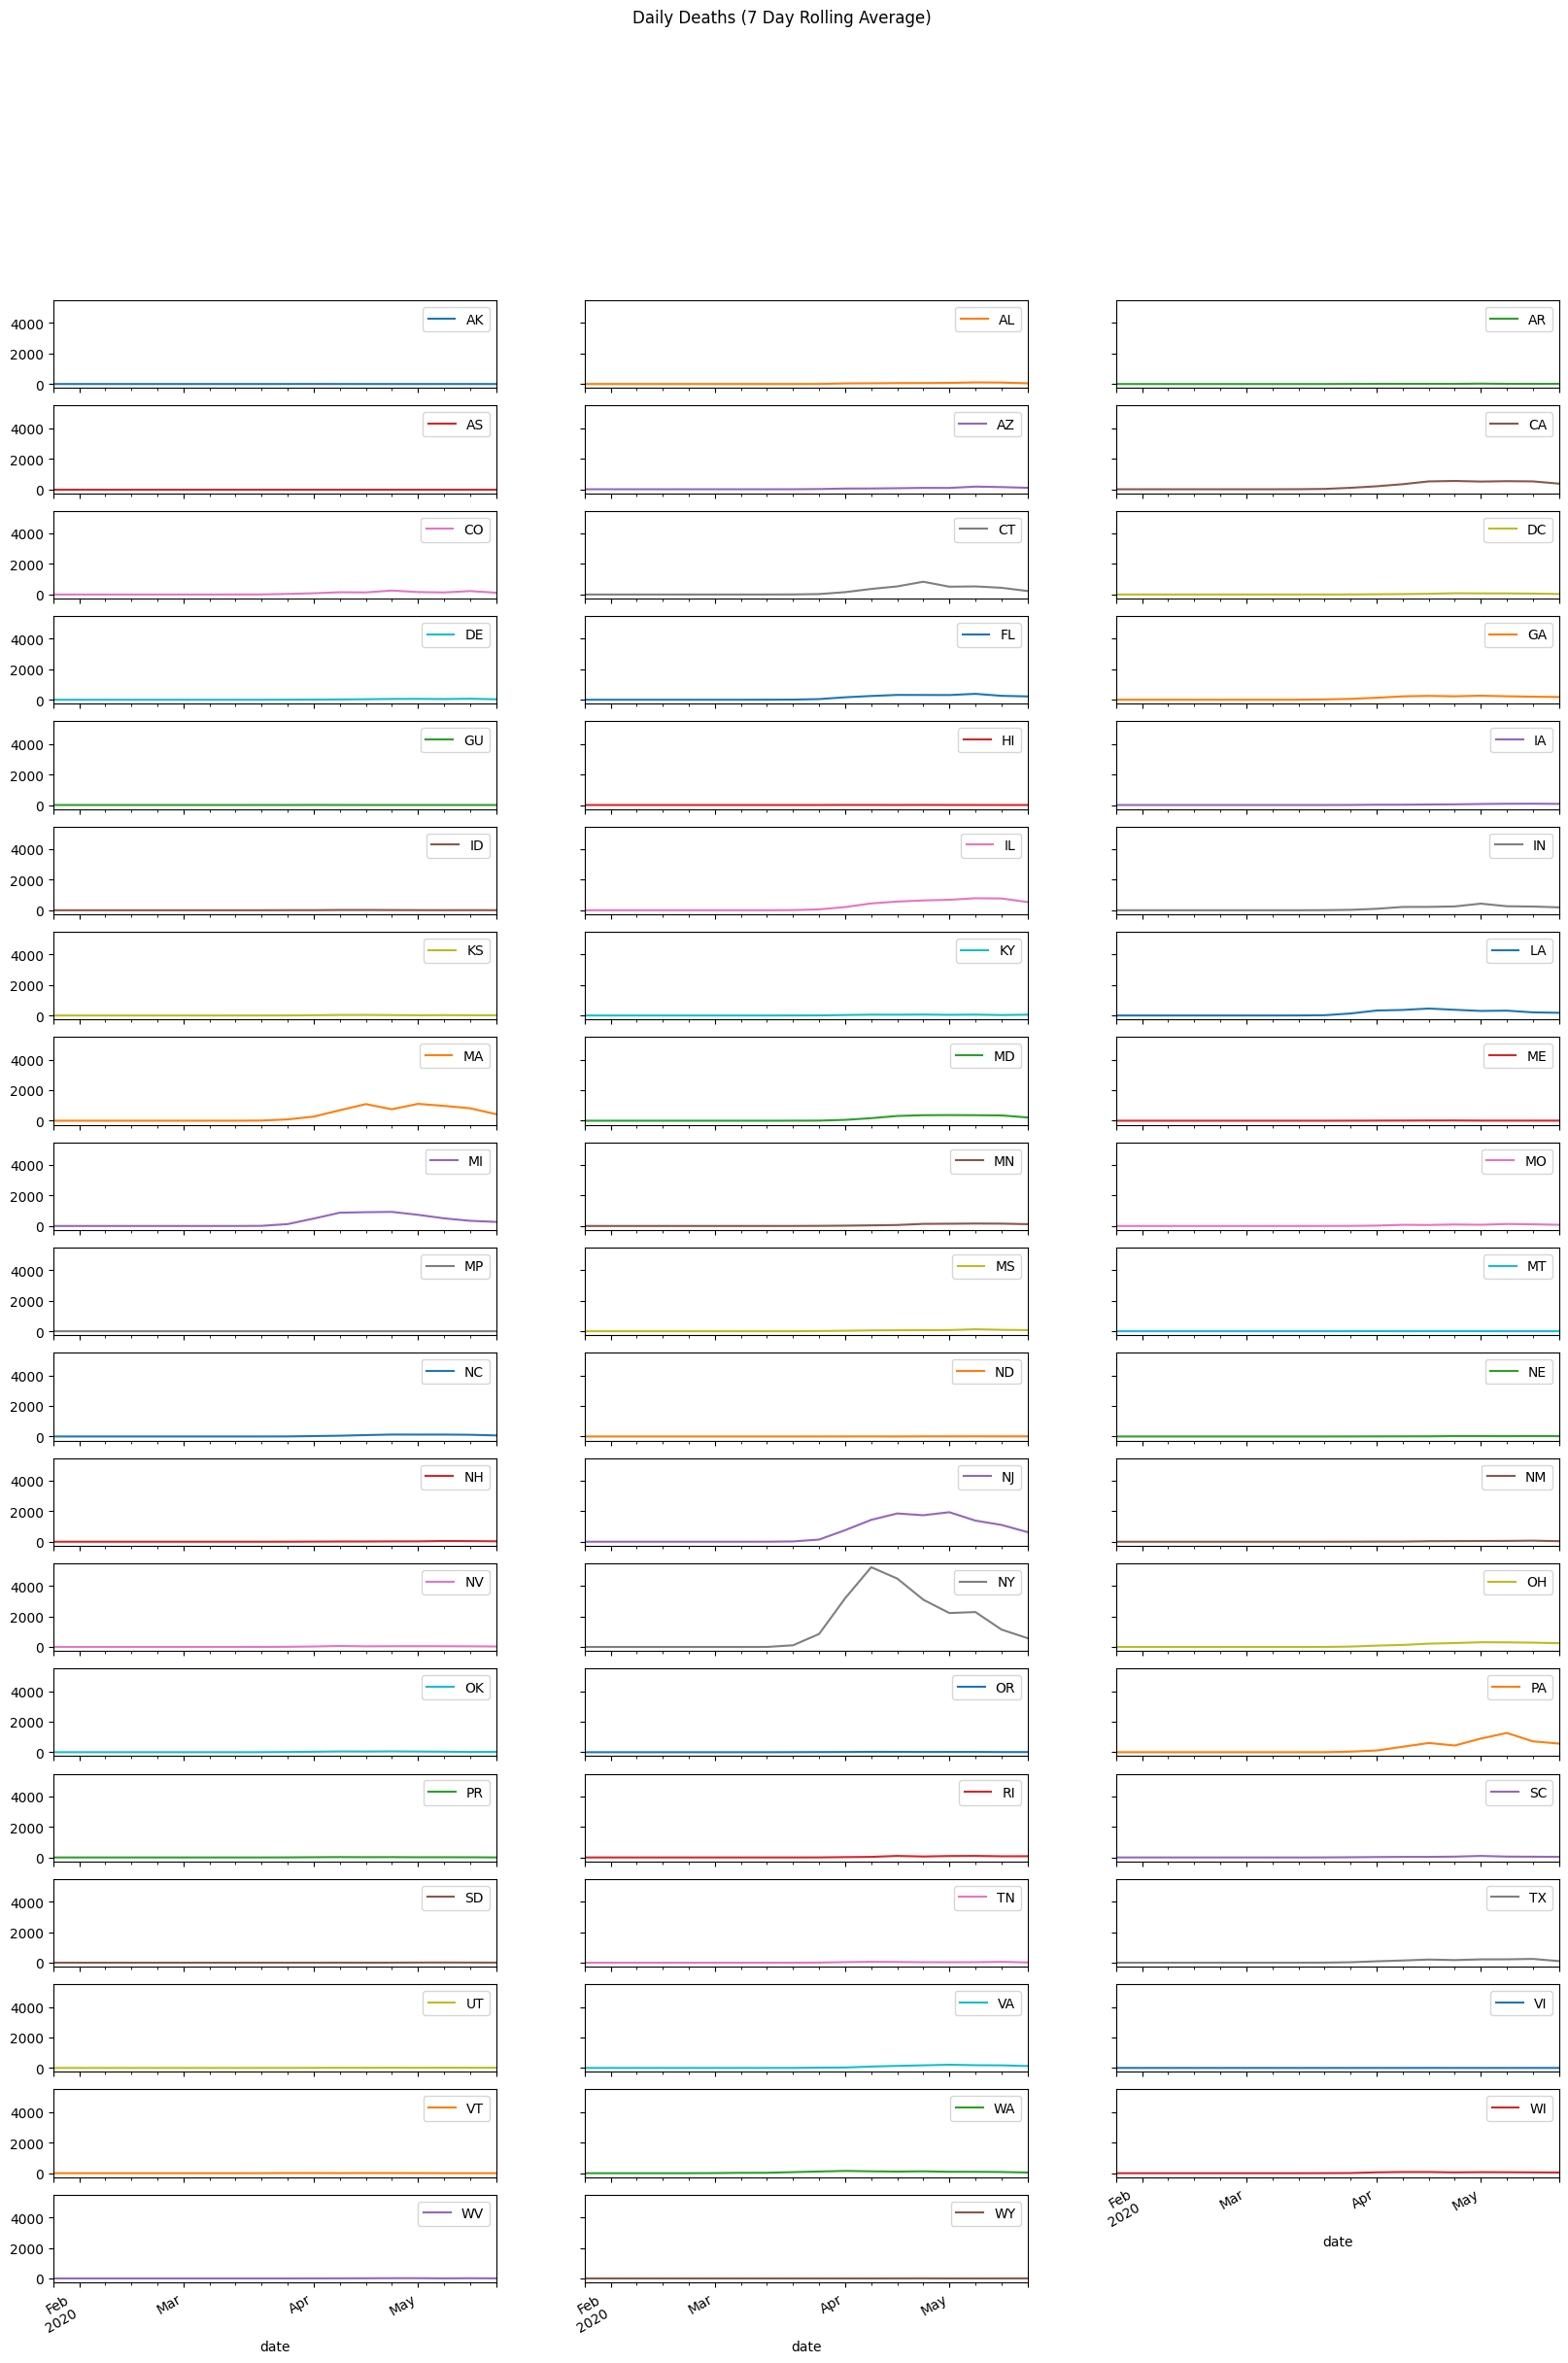

In [10]:
state_deaths = states.pivot_table(values='deathIncrease', index='date', columns=['state'])
state_deaths_weekly = state_deaths.groupby(pd.Grouper(freq='W-SUN')).sum()

state_deaths_weekly.plot(
    subplots=True,
    figsize=(20,30),
    layout=(19,3),
    sharey=True,
    title="Daily Deaths (Weekly Sum)"
)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f01aafea9e8>,
      dtype=object)

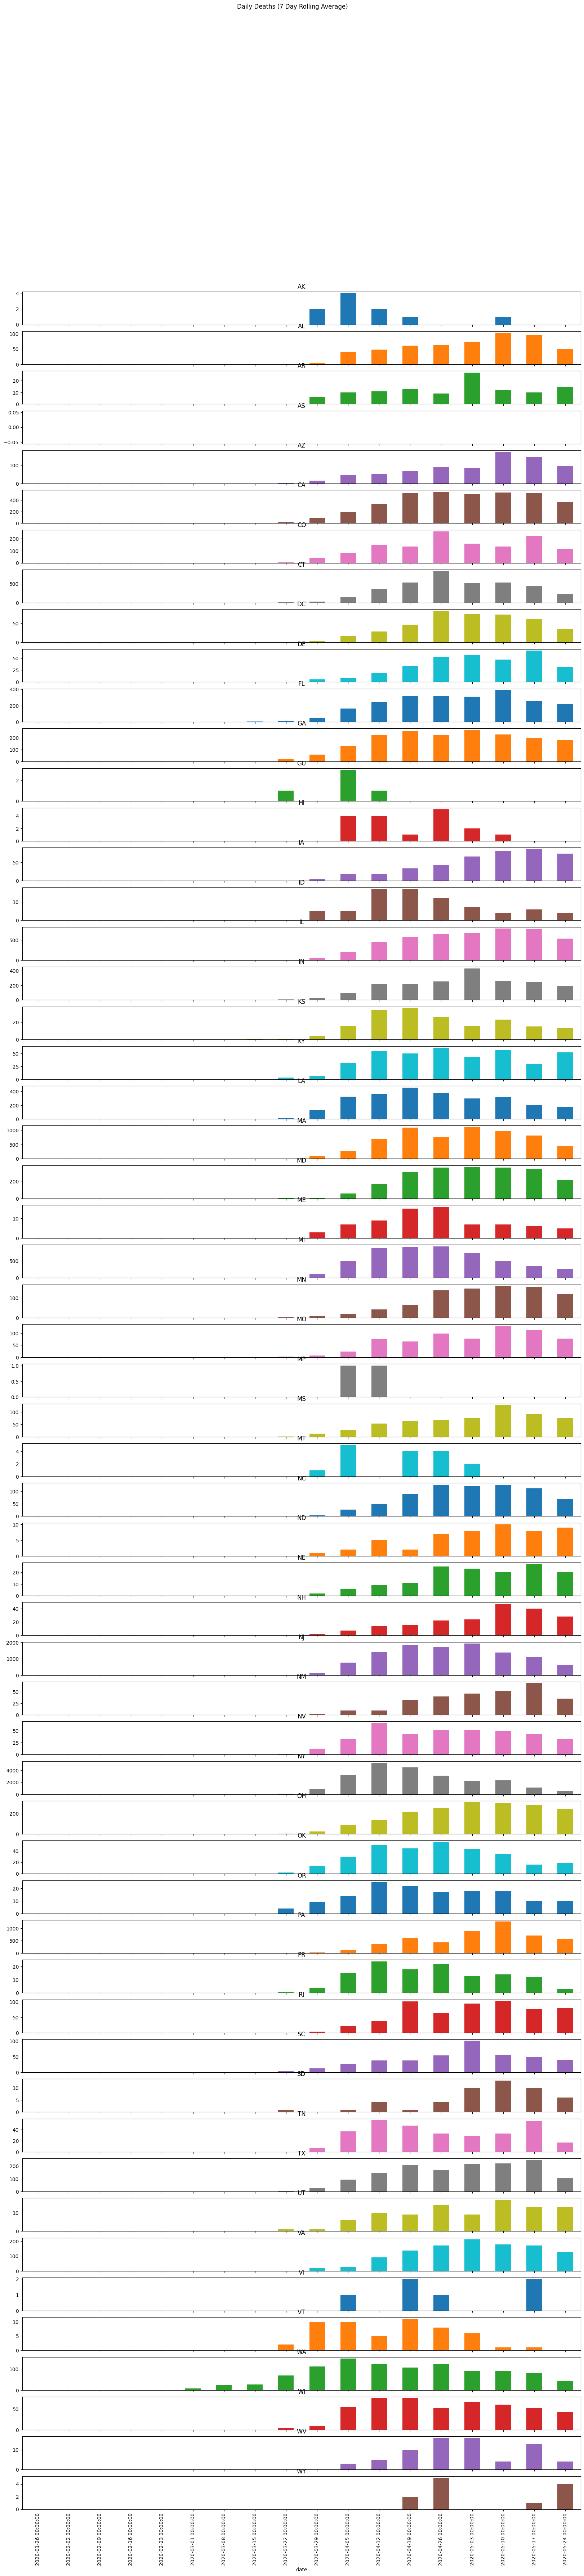

In [59]:
state_deaths_weekly.plot(
    title="Daily Deaths (7 Day Rolling Average)",
    kind='bar',
    subplots=True,
    figsize=(20,80),
    legend=False,
)

In [16]:
state_deaths_weekly.nlargest(2,'NY')

state,AK,AL,AR,AS,AZ,CA,CO,CT,DC,DE,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
date,,,,,,,,,,,,,,,,,,,,,
2020-04-12,2.0,48.0,11.0,0.0,51.0,332.0,148.0,365.0,28.0,19.0,...,57.0,144.0,10.0,90.0,0.0,5.0,123.0,76.0,5.0,0.0
2020-04-19,1.0,61.0,13.0,0.0,69.0,515.0,137.0,532.0,46.0,34.0,...,47.0,206.0,9.0,136.0,2.0,11.0,106.0,76.0,10.0,2.0


In [32]:
state_deaths_rolling = state_deaths.rolling(7).mean()
for s in state_deaths_rolling.columns:
    print(s)
    print(state_deaths_weekly[s].nlargest(2).sort_index())

AK
date
2020-03-29    2.0
2020-04-05    4.0
Freq: W-SUN, Name: AK, dtype: float64
AL
date
2020-05-10    103.0
2020-05-17     95.0
Freq: W-SUN, Name: AL, dtype: float64
AR
date
2020-05-03    27.0
2020-05-24    15.0
Freq: 3W-SUN, Name: AR, dtype: float64
AS
date
2020-01-26    0.0
2020-02-02    0.0
Freq: W-SUN, Name: AS, dtype: float64
AZ
date
2020-05-10    174.0
2020-05-17    144.0
Freq: W-SUN, Name: AZ, dtype: float64
CA
date
2020-04-26    544.0
2020-05-10    530.0
Freq: 2W-SUN, Name: CA, dtype: float64
CO
date
2020-04-26    261.0
2020-05-17    225.0
Freq: 3W-SUN, Name: CO, dtype: float64
CT
date
2020-04-19    532.0
2020-04-26    838.0
Freq: W-SUN, Name: CT, dtype: float64
DC
date
2020-04-26    82.0
2020-05-03    73.0
Freq: W-SUN, Name: DC, dtype: float64
DE
date
2020-05-03    57.0
2020-05-17    66.0
Freq: 2W-SUN, Name: DE, dtype: float64
FL
date
2020-04-19    316.0
2020-05-10    388.0
Freq: 3W-SUN, Name: FL, dtype: float64
GA
date
2020-04-19    254.0
2020-05-03    265.0
Freq: 2W-SUN, N

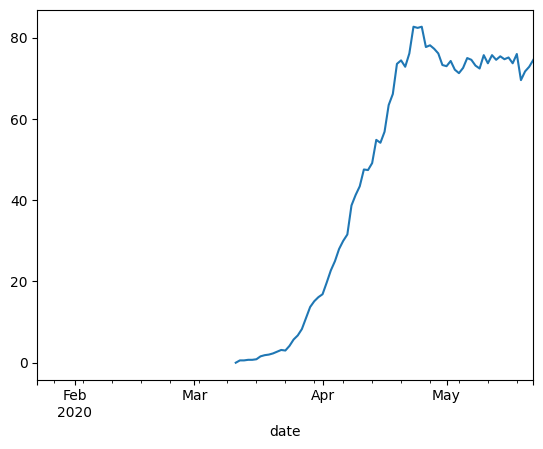

In [51]:
state_deaths_rolling['CA'].plot()

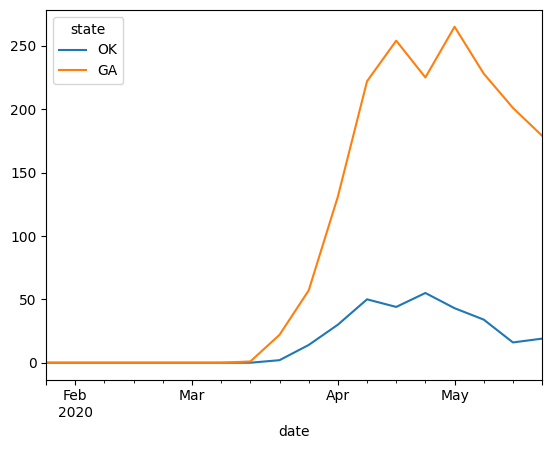

In [55]:
state_deaths_weekly[['OK','GA']].plot()

In [3]:
!ls ../coronavirus-data/
nyc = pd.read_csv("../coronavirus-data/case-hosp-death.csv", parse_dates = ['DATE_OF_INTEREST'], index_col = 'DATE_OF_INTEREST')
nyc[-20:]

Geography-resources  by-poverty.csv	  followers.json
README.md	     by-race.csv	  summary.csv
boro		     by-sex.csv		  syndromic_data.csv
boro.csv	     case-hosp-death.csv  tests-by-zcta.csv
by-age.csv	     data-by-modzcta.csv  tests.csv
by-boro.csv	     deaths


,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
DATE_OF_INTEREST,,,
2020-06-12,407,51,23
2020-06-13,194,27,12
2020-06-14,182,40,24
2020-06-15,376,49,20
2020-06-16,417,46,20
2020-06-17,347,42,20
2020-06-18,368,37,16
2020-06-19,348,40,17
2020-06-20,202,25,18


In [4]:
nyc['CASE_COUNT'].idxmax()

Timestamp('2020-04-06 00:00:00')

In [5]:
nyc['CASE_COUNT'].max()

6376

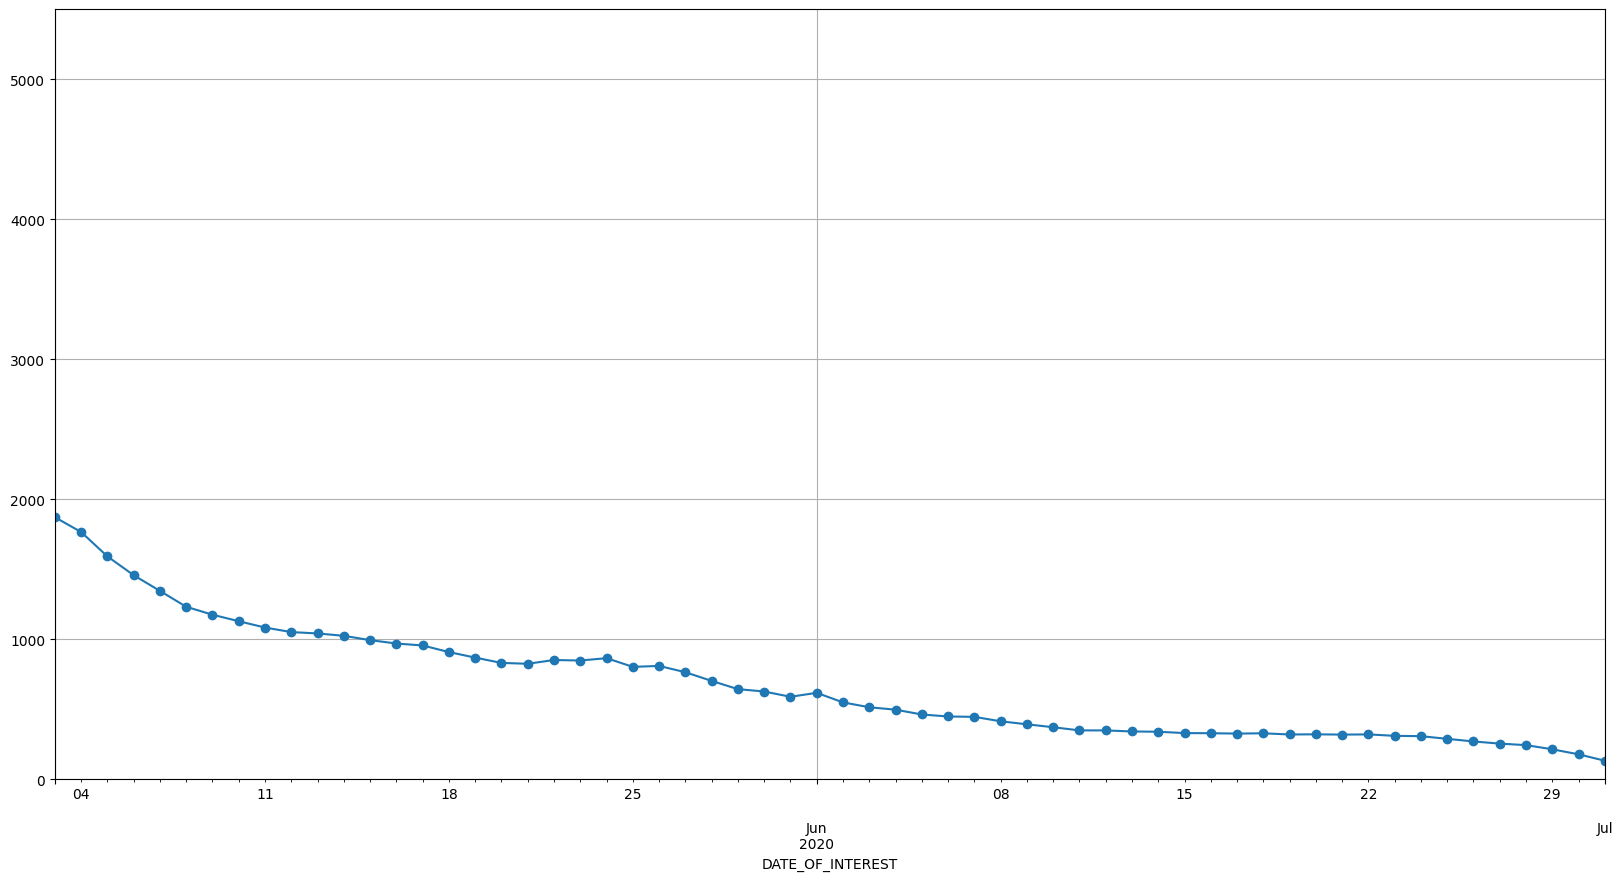

In [6]:
nyc['CASE_COUNT'].rolling(7).mean()[-60:].plot(
    figsize=(20,10),
    grid=True,
    style='o-',
    ylim=(0,5500)
)

DATE_OF_INTEREST
2020-03-01       0.500000
2020-03-08       6.571429
2020-03-15     419.714286
2020-03-22    2930.142857
2020-03-29    4305.428571
2020-04-05    5164.428571
2020-04-12    4890.428571
2020-04-19    3278.142857
2020-04-26    2611.428571
2020-05-03    1870.857143
2020-05-10    1127.857143
2020-05-17     954.714286
2020-05-24     864.000000
2020-05-31     588.142857
2020-06-07     444.714286
2020-06-14     338.428571
2020-06-21     318.000000
2020-06-28     242.714286
2020-07-05      94.333333
Freq: W-SUN, Name: CASE_COUNT, dtype: float64

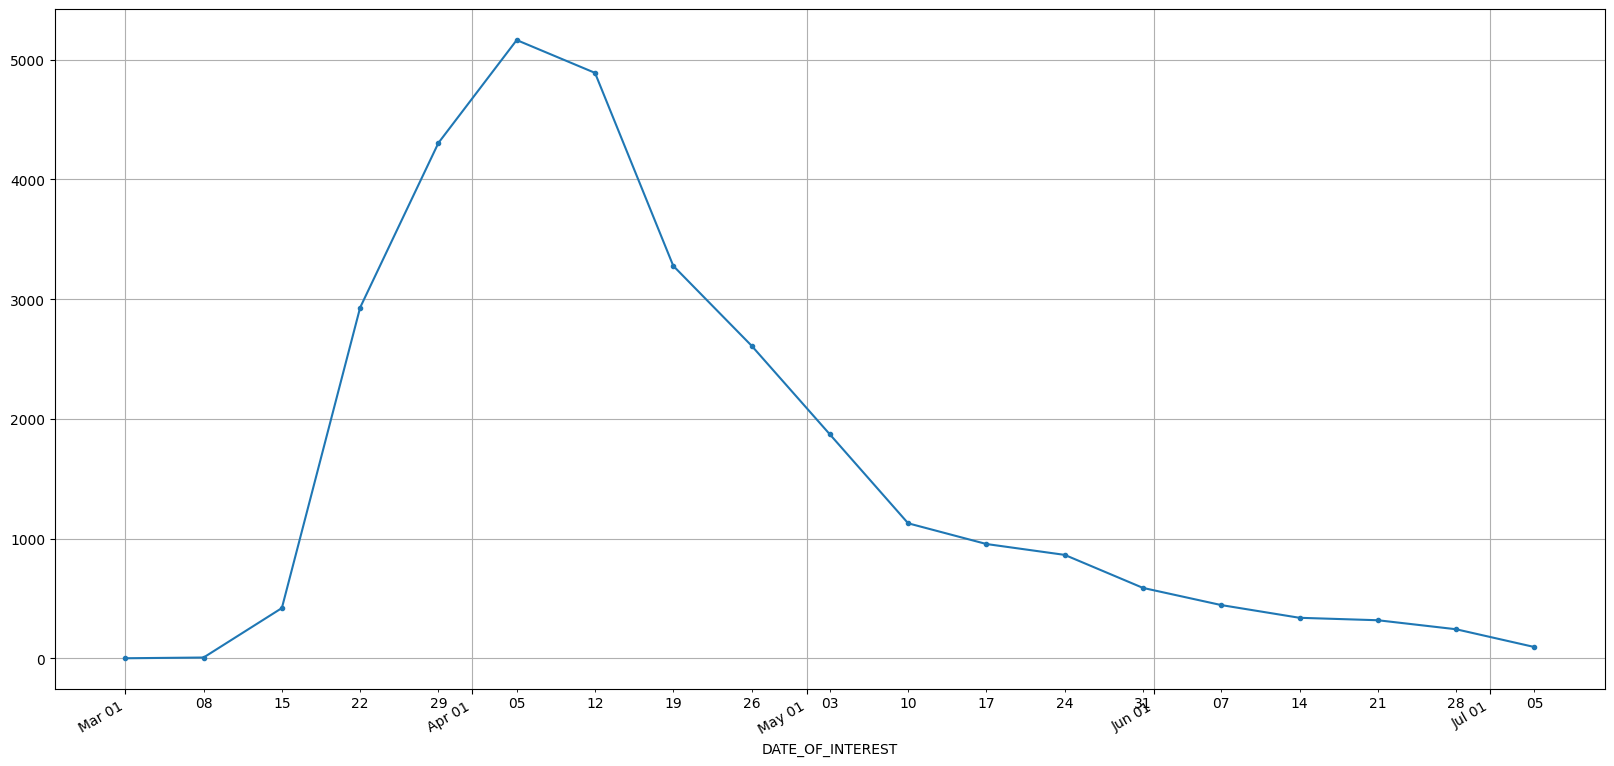

In [7]:
ax=nyc['CASE_COUNT'].groupby(pd.Grouper(freq='W-SUN')).mean().plot(
    figsize=(20,10),
    grid=True,
    x_compat=True,
    style='.-',)

ax.xaxis.set_major_locator(mdates.DayLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.SU))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))

nyc['CASE_COUNT'].groupby(pd.Grouper(freq='W-SUN')).mean()

In [465]:
!ls ../covid19_projections/projections/2020-06-05/subregion

0_Total_Deaths_Projections.csv	US_CA_Santa-Clara.csv	US_NV_Clark.csv
1_2020-06-06_Projections.csv	US_FL_Broward.csv	US_NV_Washoe.csv
Canada_Alberta.csv		US_FL_Hillsborough.csv	US_NY_Nassau.csv
Canada_British-Columbia.csv	US_FL_Miami-Dade.csv	US_NY_New-York-City.csv
Canada_Ontario.csv		US_FL_Orange.csv	US_NY_Suffolk.csv
Canada_Quebec.csv		US_FL_Palm-Beach.csv	US_NY_Westchester.csv
US_AZ_Maricopa.csv		US_IL_Cook.csv		US_PA_Philadelphia.csv
US_CA_Alameda.csv		US_LA_Orleans.csv	US_TX_Bexar.csv
US_CA_Los-Angeles.csv		US_MA_Middlesex.csv	US_TX_Dallas.csv
US_CA_Orange.csv		US_MA_Suffolk.csv	US_TX_Harris.csv
US_CA_Riverside.csv		US_MI_Wayne.csv		US_TX_Tarrant.csv
US_CA_Sacramento.csv		US_NJ_Bergen.csv	US_WA_King.csv
US_CA_San-Bernardino.csv	US_NJ_Essex.csv
US_CA_San-Diego.csv		US_NJ_Hudson.csv


In [403]:
nyc_proj = pd.read_csv("../covid19_projections/projections/2020-06-08/subregion/US_NY_New-York-City.csv", parse_dates = ['date'], index_col = 'date')
nyc_proj

,actual_deaths,total_deaths,predicted_deaths_mean,predicted_deaths_lower,predicted_deaths_upper,predicted_total_deaths_mean,predicted_total_deaths_lower,predicted_total_deaths_upper,predicted_new_infected_mean,predicted_new_infected_lower,predicted_new_infected_upper,predicted_current_infected_mean,predicted_current_infected_lower,predicted_current_infected_upper,predicted_total_infected_mean,predicted_total_infected_lower,predicted_total_infected_upper,r_values_mean
date,,,,,,,,,,,,,,,,,,
2020-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396,300,500,396,300,500,396,300,500,5.566250
2020-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396,300,500,793,600,1000,793,600,1000,5.503288
2020-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396,300,500,1189,900,1500,1189,900,1500,5.489559
2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396,300,500,1586,1200,2000,1586,1200,2000,5.472880
2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396,300,500,1982,1500,2500,1982,1500,2500,5.452633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-28,NaN,NaN,4.0,0.0,17.0,22663.0,21970.0,24354.0,375,33,1512,6526,530,25563,2124152,1341969,3243660,NaN
2020-08-29,NaN,NaN,4.0,0.0,17.0,22668.0,21971.0,24371.0,367,33,1489,6395,525,25141,2124519,1342002,3245149,NaN
2020-08-30,NaN,NaN,4.0,0.0,17.0,22672.0,21971.0,24387.0,360,32,1466,6267,520,24729,2124879,1342035,3246614,NaN


In [404]:
proj = nyc_proj['predicted_total_infected_mean'].diff().shift(12).groupby(pd.Grouper(freq='W-SUN')).sum()
actual = nyc['CASE_COUNT'].groupby(pd.Grouper(freq='W-SUN')).sum()

actual[-8:]

DATE_OF_INTEREST
2020-04-26    18271
2020-05-03    13090
2020-05-10     7893
2020-05-17     6670
2020-05-24     5990
2020-05-31     4022
2020-06-07     2782
2020-06-14      916
Freq: W-SUN, Name: CASE_COUNT, dtype: int64

Text(0.5, 1.0, 'Estimated Total Cases and Confirmed Cases Per Day')

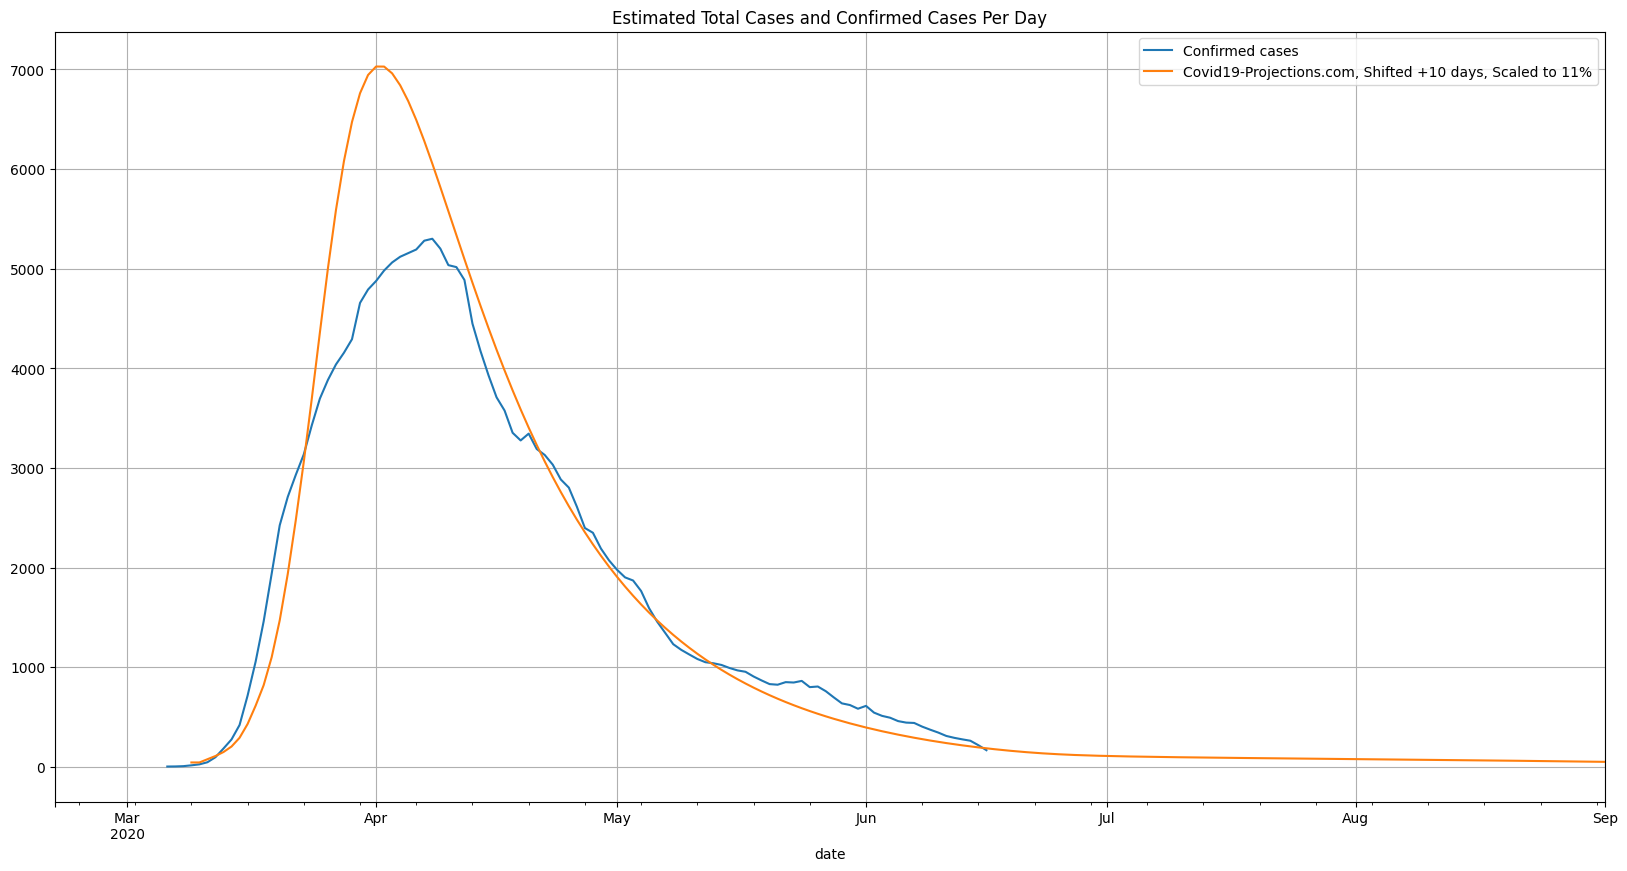

In [409]:
s=10
#(nyc['CASE_COUNT'].groupby(pd.Grouper(freq='W-SUN')).sum()/7).plot(label="Confirmed cases")
#(nyc_proj['predicted_total_infected_mean'].diff().shift(s).groupby(pd.Grouper(freq='W-SUN')).sum()/7*.11).plot(
#    label="Covid19-Projections.com, Shifted +10 days, Scaled to 11%",
#    figsize=(20,10)
#)


(nyc['CASE_COUNT'].rolling(7).mean()).plot(label="Confirmed cases")
(nyc_proj['predicted_total_infected_mean'].diff().shift(s).rolling(7).mean() * 0.11).plot(
    label="Covid19-Projections.com, Shifted +{} days, Scaled to 11%".format(s),
    figsize=(20,10)
)

(nyc_proj['predicted_total_infected_mean'].diff().shift(s).groupby(pd.Grouper(freq='W-SUN')).sum()/7*.11)[17]

plt.grid()
plt.legend()
plt.title("Estimated Total Cases and Confirmed Cases Per Day")

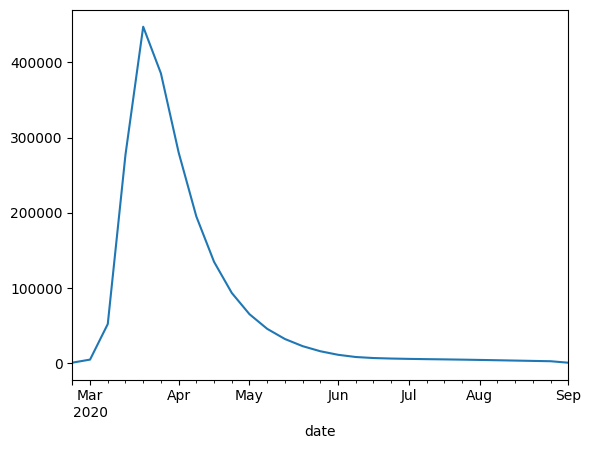

In [264]:
proj.plot()

In [385]:
!ls .
global_deaths = pd.read_csv("total-deaths-covid-19.csv", parse_dates = ['Date'], index_col = 'Date')

 COVID.ipynb			      applemobilitytrends-2020-06-07.csv
'Exponential Smoothing Model.ipynb'   errors-add-False.png
 Graphs.ipynb			      errors-add-True.png
 applemobilitytrends-2020-04-27.csv   errors-mul-False.png
 applemobilitytrends-2020-04-30.csv   errors-mul-True.png
 applemobilitytrends-2020-05-01.csv   ga_daily_cases.png
 applemobilitytrends-2020-05-03.csv   ga_mobility.png
 applemobilitytrends-2020-05-08.csv   ga_total_cases.png
 applemobilitytrends-2020-05-09.csv   lrt41.png
 applemobilitytrends-2020-05-12.csv   lrt42-pa-weekly-deaths-cases.png
 applemobilitytrends-2020-05-13.csv   lrt43_daily_wa_rolling_average.png
 applemobilitytrends-2020-05-16.csv   lrt43_weekly_cases_and_tests.png
 applemobilitytrends-2020-05-22.csv   total-deaths-covid-19.csv
 applemobilitytrends-2020-05-29.csv   us_7_day.png
 applemobilitytrends-2020-05-30.csv


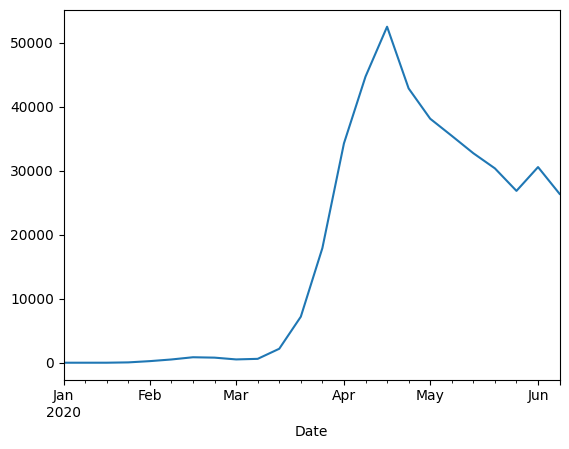

In [386]:
global_deaths[global_deaths['Entity'] == 'World']['Total confirmed deaths due to COVID-19 (deaths)'].diff().groupby(pd.Grouper(freq='W-SUN')).sum().plot()

In [392]:
weekly_global_deaths = global_deaths[global_deaths['Entity'] == 'World']['Total confirmed deaths due to COVID-19 (deaths)'].diff().groupby(pd.Grouper(freq='W-SUN')).sum()

In [388]:
1000000/30000

33.333333333333336

In [394]:
30000*28.7 + weekly_global_deaths.sum()

1286931.0

In [396]:
weekly_global_deaths / 7 

Date
2020-01-05       0.000000
2020-01-12       0.142857
2020-01-19       0.285714
2020-01-26       7.571429
2020-02-02      35.571429
2020-02-09      72.571429
2020-02-16     122.285714
2020-02-23     113.428571
2020-03-01      73.714286
2020-03-08      86.571429
2020-03-15     311.857143
2020-03-22    1028.285714
2020-03-29    2560.285714
2020-04-05    4898.714286
2020-04-12    6390.285714
2020-04-19    7504.428571
2020-04-26    6125.857143
2020-05-03    5449.428571
2020-05-10    5067.428571
2020-05-17    4678.857143
2020-05-24    4340.714286
2020-05-31    3838.000000
2020-06-07    4369.714286
2020-06-14    3771.285714
Freq: W-SUN, Name: Total confirmed deaths due to COVID-19 (deaths), dtype: float64

In [430]:
!ls .
owid_data = pd.read_csv("owid-covid-data.csv", parse_dates=['date'], index_col='date')

 COVID.ipynb			      applemobilitytrends-2020-06-07.csv
'Exponential Smoothing Model.ipynb'   errors-add-False.png
 Graphs.ipynb			      errors-add-True.png
 applemobilitytrends-2020-04-27.csv   errors-mul-False.png
 applemobilitytrends-2020-04-30.csv   errors-mul-True.png
 applemobilitytrends-2020-05-01.csv   ga_daily_cases.png
 applemobilitytrends-2020-05-03.csv   ga_mobility.png
 applemobilitytrends-2020-05-08.csv   ga_total_cases.png
 applemobilitytrends-2020-05-09.csv   lrt41.png
 applemobilitytrends-2020-05-12.csv   lrt42-pa-weekly-deaths-cases.png
 applemobilitytrends-2020-05-13.csv   lrt43_daily_wa_rolling_average.png
 applemobilitytrends-2020-05-16.csv   lrt43_weekly_cases_and_tests.png
 applemobilitytrends-2020-05-22.csv   owid-covid-data.csv
 applemobilitytrends-2020-05-29.csv   total-deaths-covid-19.csv
 applemobilitytrends-2020-05-30.csv   us_7_day.png


In [444]:
owid_data[owid_data['location'] == 'World']['new_deaths'].rolling(7).sum()

date
2019-12-31        NaN
2020-01-01        NaN
2020-01-02        NaN
2020-01-03        NaN
2020-01-04        NaN
               ...   
2020-06-22    34998.0
2020-06-23    35048.0
2020-06-24    33787.0
2020-06-25    33737.0
2020-06-26    34122.0
Name: new_deaths, Length: 179, dtype: float64

In [470]:
!ls .
rt = pd.read_csv("rt.csv", parse_dates = ['date'], index_col = 'date')
rt[-2:]

 COVID.ipynb			      errors-add-False.png
'Exponential Smoothing Model.ipynb'   errors-add-True.png
 Graphs.ipynb			      errors-mul-False.png
 applemobilitytrends-2020-04-27.csv   errors-mul-True.png
 applemobilitytrends-2020-04-30.csv   ga_daily_cases.png
 applemobilitytrends-2020-05-01.csv   ga_mobility.png
 applemobilitytrends-2020-05-03.csv   ga_total_cases.png
 applemobilitytrends-2020-05-08.csv   lrt41.png
 applemobilitytrends-2020-05-09.csv   lrt42-pa-weekly-deaths-cases.png
 applemobilitytrends-2020-05-12.csv   lrt43_daily_wa_rolling_average.png
 applemobilitytrends-2020-05-13.csv   lrt43_weekly_cases_and_tests.png
 applemobilitytrends-2020-05-16.csv   owid-covid-data.csv
 applemobilitytrends-2020-05-22.csv   rt.csv
 applemobilitytrends-2020-05-29.csv   total-deaths-covid-19.csv
 applemobilitytrends-2020-05-30.csv   us_7_day.png
 applemobilitytrends-2020-06-07.csv


,region,index,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests,new_tests,new_cases,new_deaths
date,,,,,,,,,,,,,,
2020-06-28,HI,121,1.306786,1.292068,0.998703,1.547783,16.569564,10.249141,3.516051,6.0,1177.0,1177.0,6.0,1.0
2020-06-29,HI,122,1.309205,1.295624,1.011539,1.570556,17.659593,10.838003,11.104809,27.0,1677.0,1677.0,27.0,0.0


In [516]:
adjusted_pos = pd.pivot_table(rt, index='date', values=['infections', 'test_adjusted_positive', 'positive', 'test_adjusted_positive_raw'], columns='region', aggfunc=np.sum)

adjusted_pos[-20:]

infections                                                    \
region             AK          AL          AR           AZ           CA   
date                                                                      
2020-06-10   7.468142  427.921849  271.682098  1035.551222  1589.840963   
2020-06-11   7.646177  434.447070  273.541035  1074.981747  1613.812825   
2020-06-12   7.831135  441.466695  275.366240  1116.031104  1638.872273   
2020-06-13   8.025835  449.099406  277.244432  1158.628669  1664.849704   
2020-06-14   8.233455  457.443870  279.228235  1202.522221  1691.908776   
2020-06-15   8.455460  466.453096  281.347883  1248.140199  1720.023101   
2020-06-16   8.693746  476.114260  283.601568  1296.161194  1749.321292   
2020-06-17   8.950254  486.490597  286.054020  1346.697598  1779.817032   
2020-06-18   9.225169  497.565581  288.778001  1399.841389  1811.630238   
2020-06-19   9.517781  509.299710  291.693211  1456.279717  1845.059465   
2020-06-20   9.829401  521.752335  294.745435  1516.062171  1880.159574   
2020-06-21  10.160690  534.898005  298.000239  1579.182659  1917.210693   
2020-06-22  10.512644  548.789793  301.574889  1645.526416  1956.639052   
2020-06-23  10.886721  563.475073  305.559046  1715.261803  1998.576509   
2020-06-24  11.284717  578.899579  309.934016  1789.173241  2042.832243   
2020-06-25  11.705310  595.124350  314.673454  1868.141768  2089.662379   
2020-06-26  12.149190  612.281338  319.740284  1952.480529  2140.023572   
2020-06-27  12.623536  630.444926  325.123877  2042.667577  2194.133167   
2020-06-28  13.132841  649.876173  330.864073  2139.062239  2251.680793   
2020-06-29  13.677032  670.820468  337.080292  2242.207343  2312.509014   

                                                                     ...  \
region             CO         CT         DC         DE           FL  ...   
date                                                                 ...   
2020-06-10  95.130898  35.471871  21.483625  31.830939  1673.132104  ...   
2020-06-11  94.736724  33.822385  20.366698  31.927636  1782.162478  ...   
2020-06-12  94.423265  32.260020  19.319908  32.058331  1897.625956  ...   
2020-06-13  94.179043  30.789938  18.335582  32.225117  2019.944019  ...   
2020-06-14  94.015953  29.405471  17.409788  32.419615  2149.753125  ...   
2020-06-15  93.936403  28.097131  16.541676  32.638599  2286.871132  ...   
2020-06-16  93.920266  26.859940  15.728017  32.883510  2431.167922  ...   
2020-06-17  93.955353  25.688579  14.965225  33.151864  2583.888252  ...   
2020-06-18  94.037696  24.575185  14.250339  33.440369  2746.923217  ...   
2020-06-19  94.168129  23.521525  13.580401  33.749754  2920.692628  ...   
2020-06-20  94.348722  22.529447  12.951216  34.082845  3106.709173  ...   
2020-06-21  94.580648  21.596067  12.359249  34.439590  3306.842406  ...   
2020-06-22  94.870874  20.717713  11.804113  34.818150  3520.990796  ...   
2020-06-23  95.242060  19.891174  11.282377  35.220914  3750.482528  ...   
2020-06-24  95.695484  19.113016  10.791645  35.652375  3998.850061  ...   
2020-06-25  96.244092  18.383030  10.330337  36.111062  4268.007260  ...   
2020-06-26  96.904926  17.697035   9.897107  36.596732  4558.325948  ...   
2020-06-27  97.698486  17.048355   9.489830  37.117360  4871.858583  ...   
2020-06-28  98.623992  16.434409   9.107706  37.684376  5211.546312  ...   
2020-06-29  99.672035  15.853252   8.749815  38.304902  5579.306406  ...   

           test_adjusted_positive_raw                                        \
region                             SD           TN           TX          UT   
date                                                                          
2020-06-10                  37.009125   527.060978  3262.048149  338.553395   
2020-06-11                  40.161710   610.329905   722.162974  254.479324   
2020-06-12                  42.574932    88.658477  1817.781602  254.051843   
2020-06-13                  42.074443   306.906407  1249.91371

Text(0.5, 1.0, 'Positive cases after adjusting for number of tests (United States)')

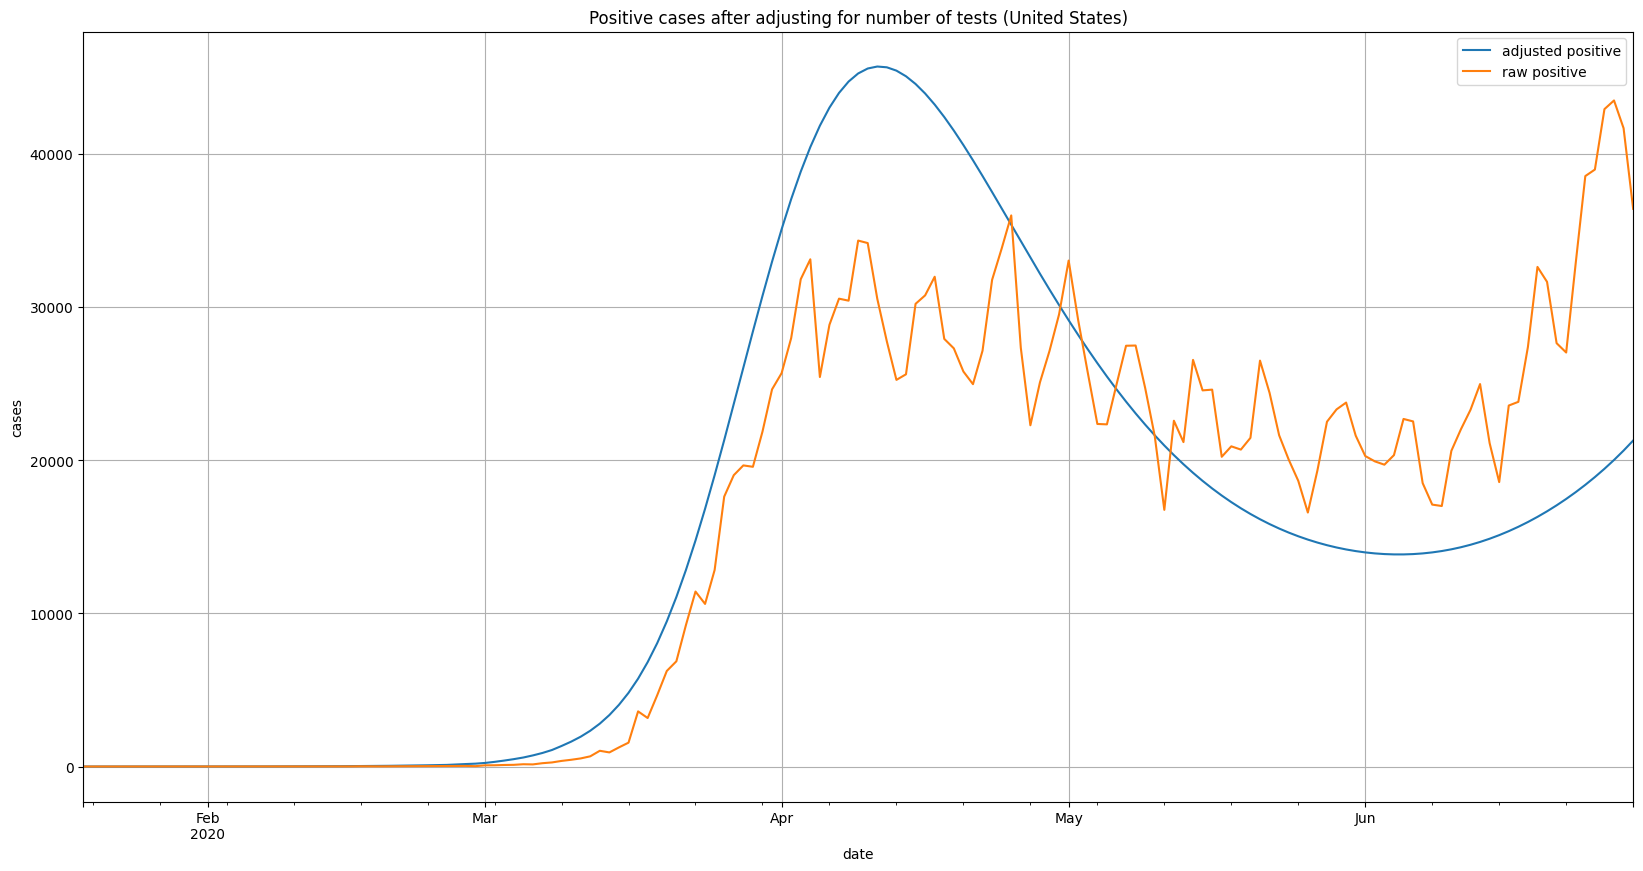

In [520]:
adjusted_pos['test_adjusted_positive'].sum(axis=1).plot(legend=True, grid=True, label="adjusted positive")
ax = adjusted_pos['positive'].sum(axis=1).plot(legend=True, grid=True, label="raw positive", figsize=(20,10))

ax.set_ylabel("cases")
ax.set_title("Positive cases after adjusting for number of tests (United States)")
